## **Project 5 - Feature Selection, Model Selection and Tuning**

### **Title**: *Credit Card Users Churn Prediction*

### **Author**: *Pankaj Singh*

<br>

**Domain** 

Market analytics/Customer prediction

**Project Context**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

**Data Description** 

The data contains characteristics of the clients.

**Customer Information** 

- **`CLIENTNUM`** : Client number. Unique identifier for the customer holding the account <br>
- **`Attrition_Flag`** : Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" <br>
- **`Customer_Age`** : Age in Years <br>
- **`Gender`** : Gender of the account holder <br>
- **`Dependent_count`** : Number of dependents <br>
- **`Education_Level`** : Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate. <br>
- **`Marital_Status`** : Marital Status of the account holder <br>
- **`Income_Category`** : Annual Income Category of the account holder <br>

- **`Card_Category`** : Type of Card <br>
- **`Months_on_book`** : Period of relationship with the bank <br>
- **`Total_Relationship_Count`** : Total no. of products held by the customer <br>
- **`Months_Inactive_12_mon`** : No. of months inactive in the last 12 months <br>
- **`Contacts_Count_12_mon`** : No. of Contacts between the customer and bank in the last 12 months <br>
- **`Credit_Limit`** : Credit Limit on the Credit Card <br>
- **`Total_Revolving_Bal`** : The balance that carries over from one month to the next is the revolving balance <br>
- **`Avg_Open_To_Buy`** :  Open to Buy refers to the amount left on the credit card to use (Average of last 12 months) <br>
- **`Total_Trans_Amt`** : Total Transaction Amount (Last 12 months) <br>
- **`Total_Trans_Ct`** : Total Transaction Count (Last 12 months) <br>
- **`Total_Ct_Chng_Q4_Q1`** : Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter <br>
- **`Total_Amt_Chng_Q4_Q1`** : Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter <br>
- **`Avg_Utilization_Ratio`** : Represents how much of the available credit the customer spent <br>

**Project Deliverables**

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

**Learning Objective**

- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank

## **Import Libraries**

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("ggplot")
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer, KNNImputer

# To do oversmapling and undersampling of data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<IPython.core.display.Javascript object>

## **Load data \& get a first glimpse**

In [2]:
# Load data from csv file
data = pd.read_csv("BankChurners.csv")
churn = data.copy()

<IPython.core.display.Javascript object>

- #### Shape of the dataset

In [3]:
## Print out the shape of the dataset
churn.shape

(10127, 21)

<IPython.core.display.Javascript object>

- So we have 10127 entries of our data
- We have 21 columns in our dataset

- #### A peek at the 5 random rows of the dataset

In [4]:
## Print out the random 5 rows of the data
churn.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

- #### Drop the redundant columns

CLIENTNUM does not seem to provide any useful information , so we will drop the `CLIENTNUM` column

In [5]:
churn.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

- #### Look at the column names

In [6]:
## show the number of columns and column names
print("Total number of columns : ", len(churn.columns))
print("\nColumn names : \n\n", churn.columns.to_list())

Total number of columns :  20

Column names : 

 ['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


<IPython.core.display.Javascript object>

- #### Look at the missing values

In [7]:
# Show the null values
print("Missing values : \n\n", churn.isnull().sum().sort_values())

Missing values : 

 Attrition_Flag                 0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Avg_Open_To_Buy                0
Total_Revolving_Bal            0
Credit_Limit                   0
Contacts_Count_12_mon          0
Months_Inactive_12_mon         0
Total_Relationship_Count       0
Months_on_book                 0
Card_Category                  0
Income_Category                0
Dependent_count                0
Gender                         0
Customer_Age                   0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Marital_Status               749
Education_Level             1519
dtype: int64


<IPython.core.display.Javascript object>

- The Marital status and Education level columns have missing data

- #### Convert all column names to lower case

In [8]:
churn.columns = churn.columns.str.lower()

<IPython.core.display.Javascript object>

- #### Look at the simple statistical distribution of data

In [9]:
churn.describe().T

count     mean      std      min      25%  \
customer_age             10127.000   46.326    8.017   26.000   41.000   
dependent_count          10127.000    2.346    1.299    0.000    1.000   
months_on_book           10127.000   35.928    7.986   13.000   31.000   
total_relationship_count 10127.000    3.813    1.554    1.000    3.000   
months_inactive_12_mon   10127.000    2.341    1.011    0.000    2.000   
contacts_count_12_mon    10127.000    2.455    1.106    0.000    2.000   
credit_limit             10127.000 8631.954 9088.777 1438.300 2555.000   
total_revolving_bal      10127.000 1162.814  814.987    0.000  359.000   
avg_open_to_buy          10127.000 7469.140 9090.685    3.000 1324.500   
total_amt_chng_q4_q1     10127.000    0.760    0.219    0.000    0.631   
total_trans_amt          10127.000 4404.086 3397.129  510.000 2155.500   
total_trans_ct           10127.000   64.859   23.473   10.000   45.000   
total_ct_chng_q4_q1      10127.000    0.712    0.238    0.000    0.582   
avg_utilization_ratio    10127.000    0.275    0.276    0.000    0.023   

                              50%       75%       max  
customer_age               46.000    52.000    73.000  
dependent_count             2.000     3.000     5.000  
months_on_book             36.000    40.000    56.000  
total_relationship_count    4.000     5.000     6.000  
months_inactive_12_mon      2.000     3.000     6.000  
contacts_count_12_mon       2.000     3.000     6.000  
credit_limit             4549.000 11067.500 34516.000  
total_revolving_bal      1276.000  1784.000  2517.000  
avg_open_to_buy          3474.000  9859.000 34516.000  
total_amt_chng_q4_q1        0.736     0.859     3.397  
total_trans_amt          3899.000  4741.000 18484.000  
total_trans_ct             67.000    81.000   139.000  
total_ct_chng_q4_q1         0.702     0.818     3.714  
avg_utilization_ratio       0.176     0.503     0.999

<IPython.core.display.Javascript object>

- #### Look at the datatype in columns and break down the columns based on data type

In [10]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           8608 non-null   object 
 5   marital_status            9378 non-null   object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

<IPython.core.display.Javascript object>

In [11]:
# Categorical columns
catcols = churn.select_dtypes(include="object").columns.to_list() + [
    "dependent_count",
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
]
# Numerical columns
numcols = list(set(churn.columns.to_list()) - set(catcols))

<IPython.core.display.Javascript object>

- The columns dependent_count, total_relationship_count, months_inactive_12_mon and contacts_count_12_mon are although categorical, but their order could be significant. So we keep them as numerical variables but will treat them as categorical for EDA.

- #### Value counts for categorical variables

In [12]:
for catcol in catcols:
    print(f"Feature Name : {catcol} \n")
    print(
        f"Total non null values = {len(churn[catcol]) - churn[catcol].isnull().sum()} \n"
    )
    print(churn[catcol].value_counts(), "\n")
    print("-" * 30, "\n")

Feature Name : attrition_flag 

Total non null values = 10127 

Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64 

------------------------------ 

Feature Name : gender 

Total non null values = 10127 

F    5358
M    4769
Name: gender, dtype: int64 

------------------------------ 

Feature Name : education_level 

Total non null values = 8608 

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64 

------------------------------ 

Feature Name : marital_status 

Total non null values = 9378 

Married     4687
Single      3943
Divorced     748
Name: marital_status, dtype: int64 

------------------------------ 

Feature Name : income_category 

Total non null values = 10127 

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: income_category,

<IPython.core.display.Javascript object>

- #### Describe rhe continuous numerical data

In [13]:
for numcol in numcols:
    print(f"Feature Name : {numcol} \n")
    print(churn[numcol].describe().T, "\n")
    print("-" * 30, "\n")

#     churn[numcols].describe().T

Feature Name : months_on_book 

count   10127.000
mean       35.928
std         7.986
min        13.000
25%        31.000
50%        36.000
75%        40.000
max        56.000
Name: months_on_book, dtype: float64 

------------------------------ 

Feature Name : total_trans_amt 

count   10127.000
mean     4404.086
std      3397.129
min       510.000
25%      2155.500
50%      3899.000
75%      4741.000
max     18484.000
Name: total_trans_amt, dtype: float64 

------------------------------ 

Feature Name : avg_utilization_ratio 

count   10127.000
mean        0.275
std         0.276
min         0.000
25%         0.023
50%         0.176
75%         0.503
max         0.999
Name: avg_utilization_ratio, dtype: float64 

------------------------------ 

Feature Name : total_amt_chng_q4_q1 

count   10127.000
mean        0.760
std         0.219
min         0.000
25%         0.631
50%         0.736
75%         0.859
max         3.397
Name: total_amt_chng_q4_q1, dtype: float64 

-------------

<IPython.core.display.Javascript object>

## Observations:

- There are 10127 rows in this data set and 20 columns
- attrition_flag is our target variable
- Some columns are missing values and are as follows in the descending order
    - marital_status (749)
    - education_level (1519)
    
    
    
- Observations on **categorical variables**

    - The target variable attrition_flag is imbalanced with 1627 records of attrited customers and almost 5 times record of existing customers
    - There are more female customers in the dataset than males
    - Majority customers have graduate level education
    - Majority customers are married, followed by single and divorced
    - Most of the customers belong to the income group of less than \\$40k
    - Very big chunk of customers have Blue card
    - Majority customers have 3 dependents followed by 2
    - Majority relationship_count is 3
    - Majority month_inactive_12_mon is 3
    - Majority contacts_count_12_mon is 3
    

- Observations on **numerical variables**

    - The mean and median for total_trans_ct are 64.859 and 67 respectively. There is a slight left skew in data.
    - The mean and median for total_trans_amnt are 4404 and 3899 respectively. There is a slight right skew in data.
    - The mean and median for customer_age are 46.32 and 46 respectively. There is a slight right skew in data.
    - The mean and median for total_revolving_bal are 1163 and 1276 respectively. There is a slight left skew in data.
    - The mean and median for avg_open_to_buy are 7469 and 3474 respectively. There is a slight right skew in data.
    - The mean and median for credit_limit are 8632 and 4549 respectively. There is a significant right skew in data.
    - The mean and median for total_amt_chng_q4_q1 are 0.76 and 0.734 respectively. There is a slight right skew in data.
    - The mean and median for total_ct_chng_q4_q1 are 0.71 and 0.70 respectively. There is a slight right skew in data.
    - The mean and median for months_on_book are 36 and 36 respectively. There is no skew in data.
    - The mean and median for avg_utilization_ratio are 0.28 and 0.17 respectively. There is significant right skew in data.

## **Exploratory Data Analysis**

- ### EDA of numerical data

In [14]:
# function to show univariate analysis of continuous data columns
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    f2.suptitle("SPREAD OF DATA FOR " + feature, fontsize=18, fontweight="bold")


# Function to create two box plots of the numerical feature of interest based on the outocmes of target
def target_centric_boxplot(data, feature, target="attrition_flag"):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    sns.boxplot(data=churn, x="attrition_flag", y=feature)
    fig.suptitle(
        "Target centric distribution of " + feature, fontsize=14, fontweight="bold"
    )

<IPython.core.display.Javascript object>

- #### Show pair plots with the hue of attrition_flag

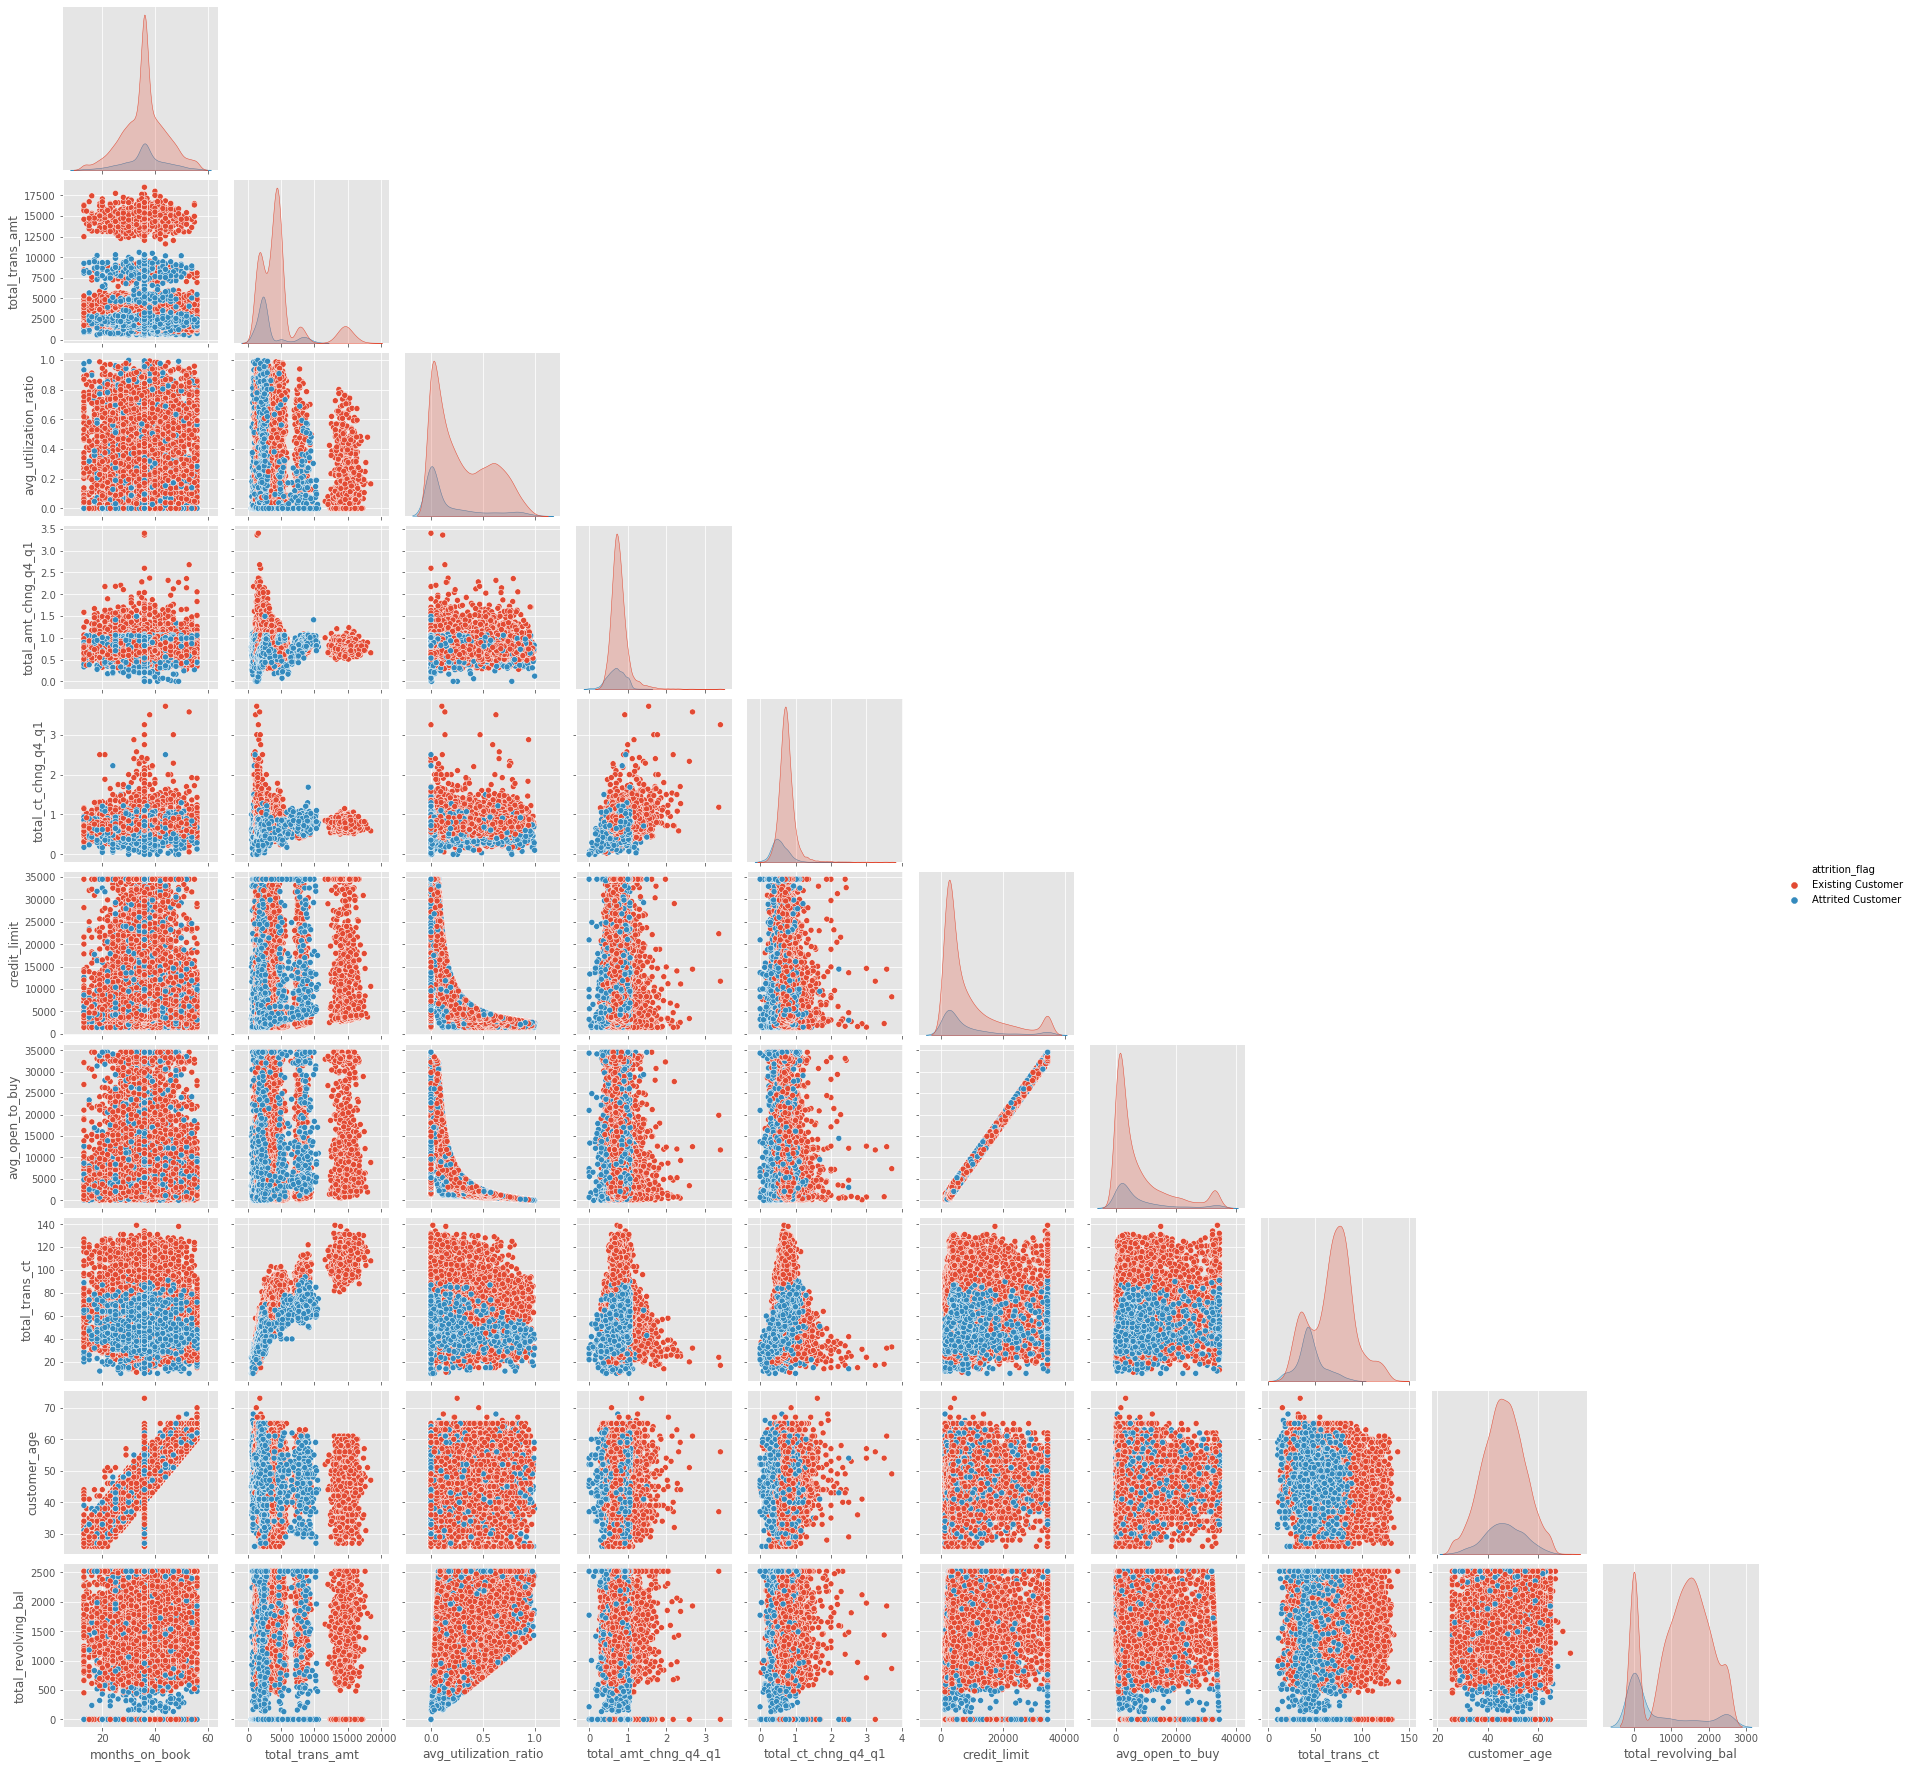

<IPython.core.display.Javascript object>

In [15]:
sns.pairplot(
    churn[np.append(numcols, "attrition_flag")], hue="attrition_flag", corner=True,
)

- #### Show correlation values

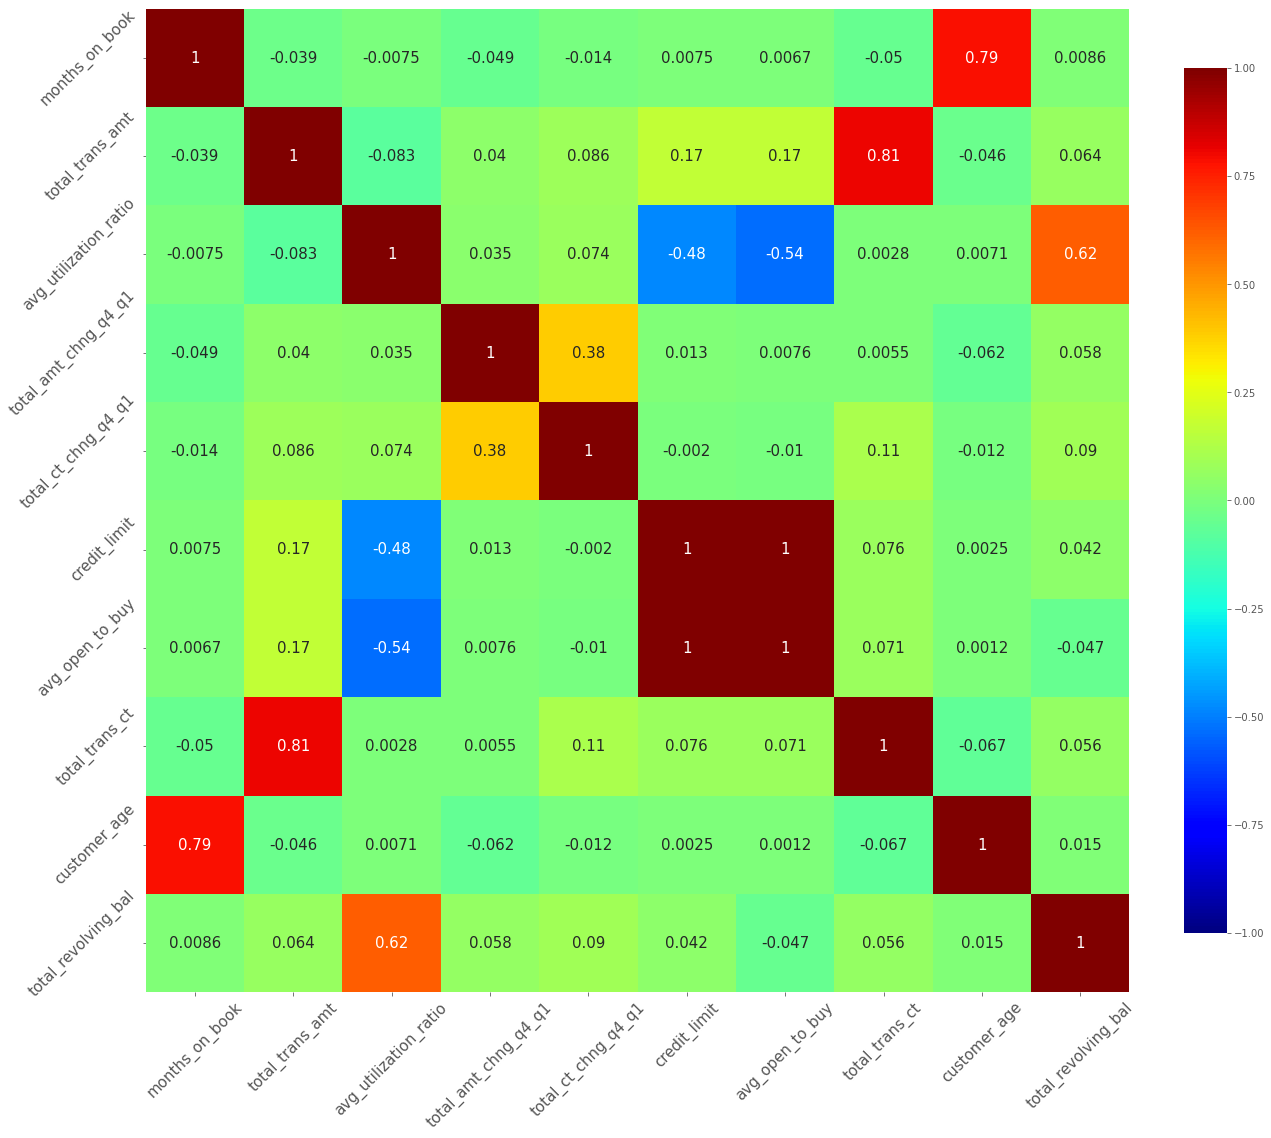

<IPython.core.display.Javascript object>

In [16]:
# Show the coorelation of numerical values on a color coded matrix

corr = churn[numcols].corr()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))
fig.tight_layout(pad=2.0)

sns.heatmap(
    corr,
    annot=True,
    ax=ax,
    annot_kws={"fontsize": 15},
    cmap="jet",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"fraction": 0.04},
)
ax.tick_params(axis="both", rotation=45, labelsize=15)

- #### Looping over all the numerical columns to show histogram barplot

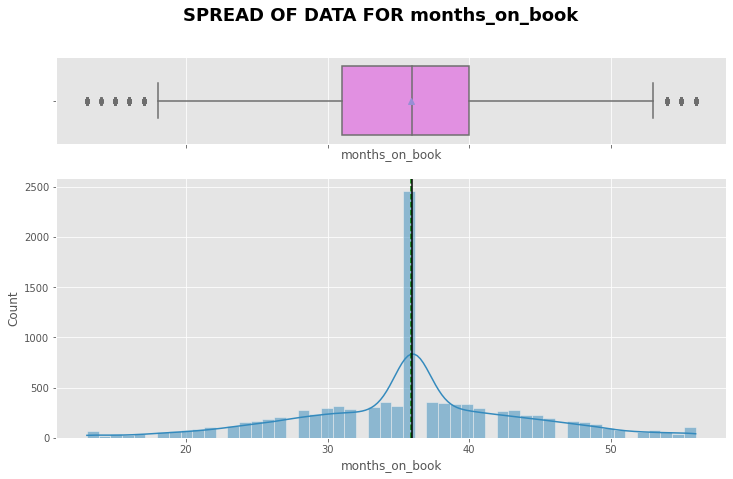

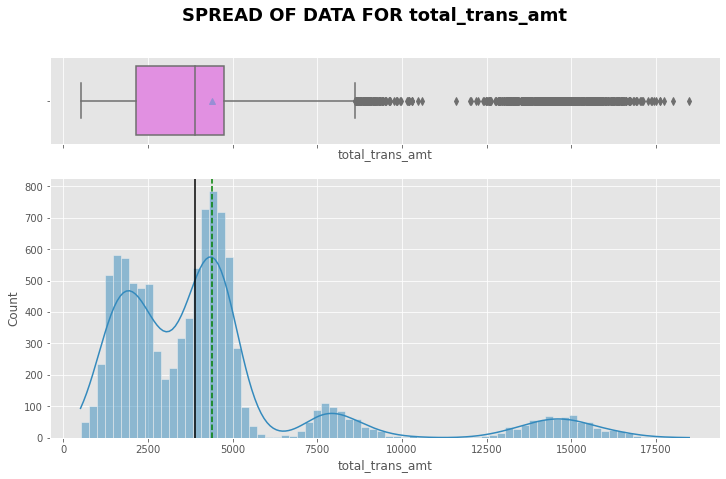

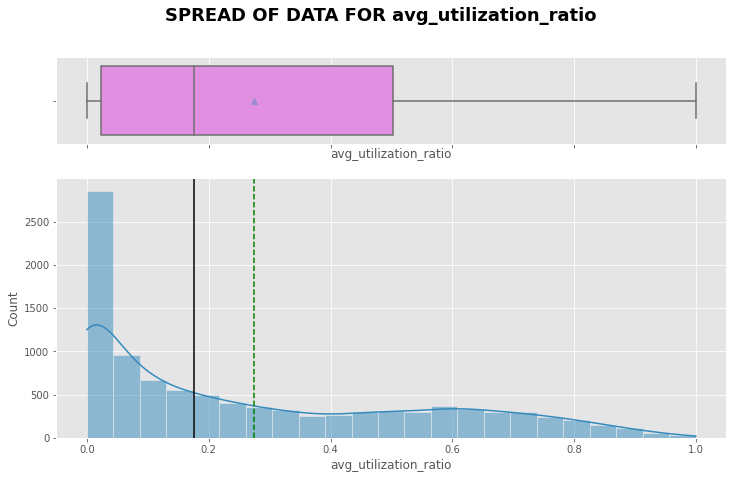

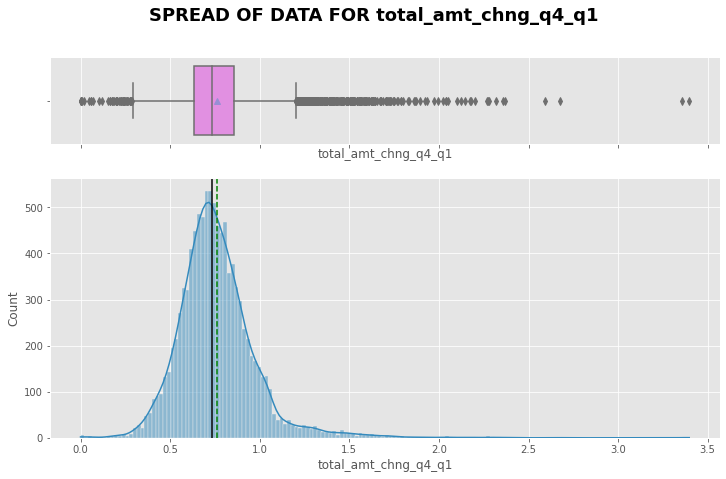

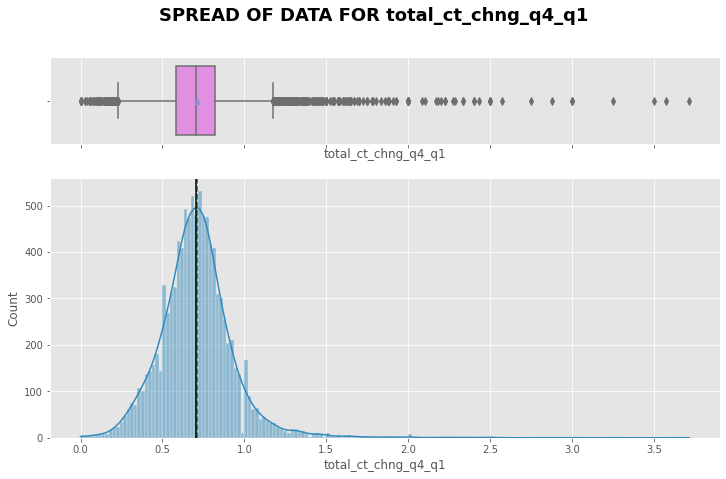

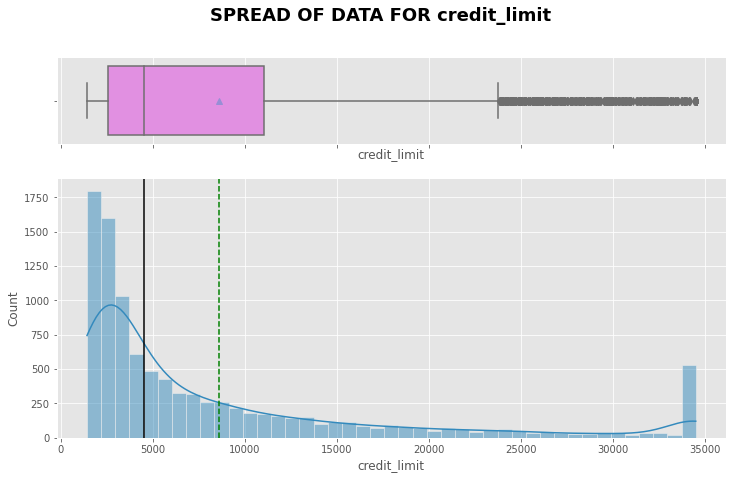

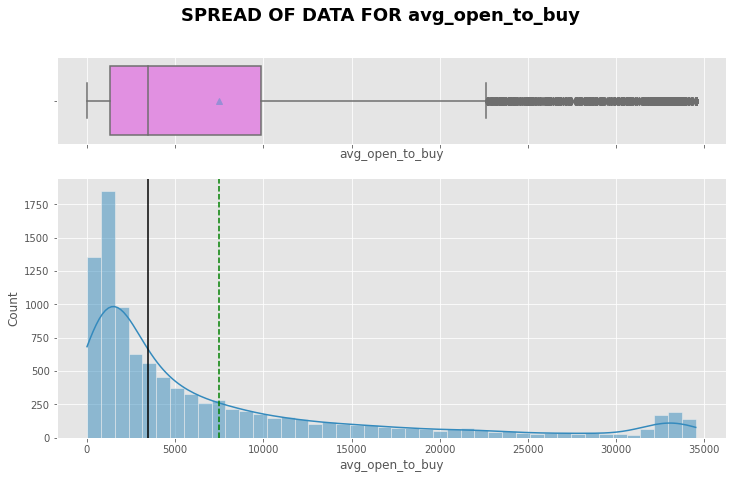

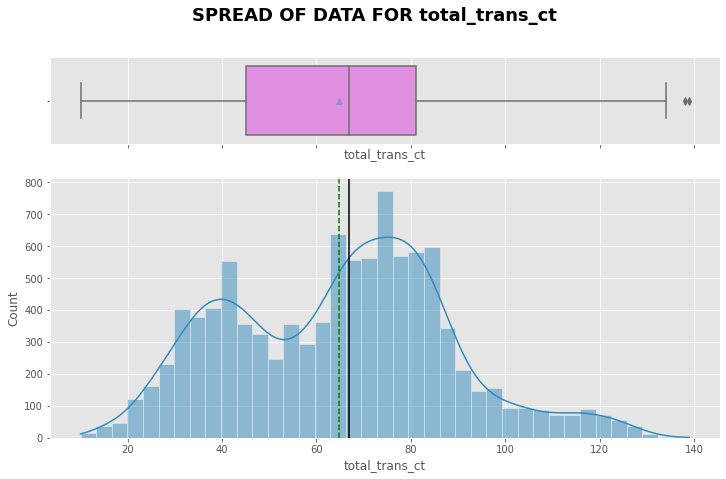

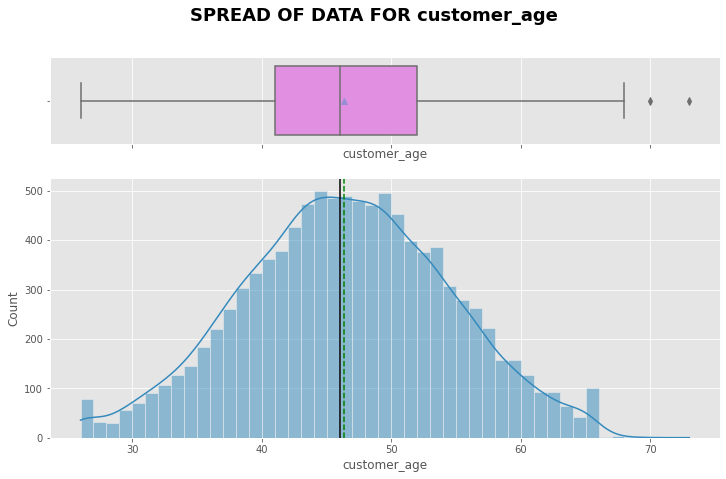

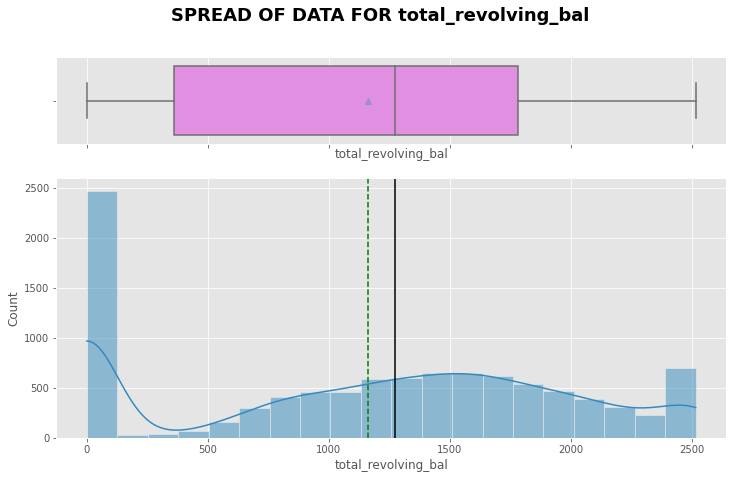

<IPython.core.display.Javascript object>

In [17]:
for numcol in numcols:
    histogram_boxplot(churn, numcol, figsize=(12, 7), kde=True, bins=None)

- #### Looping over all the numerical columns to show target centric boxplot

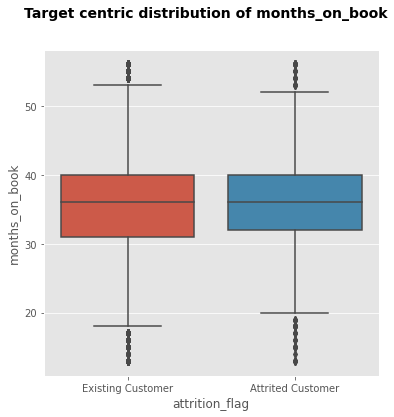

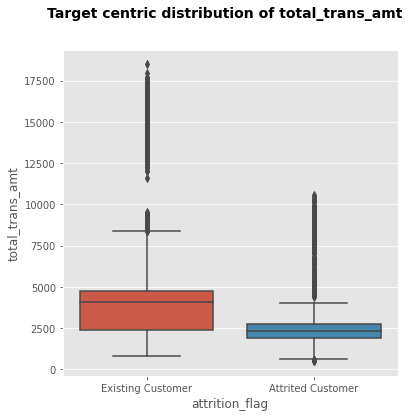

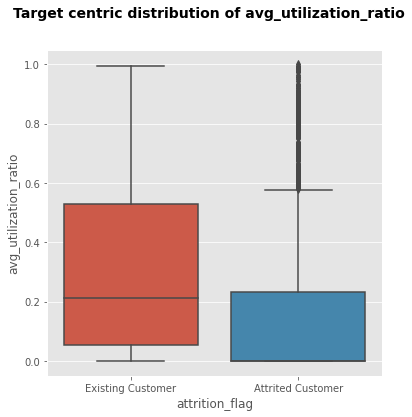

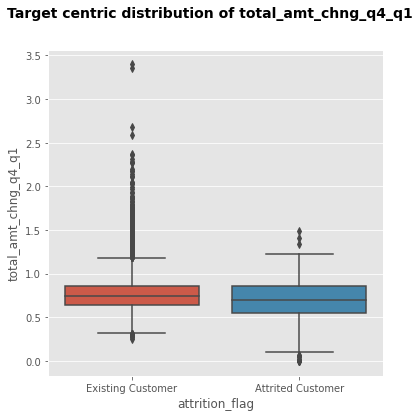

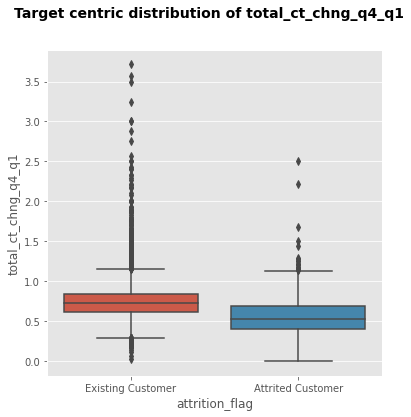

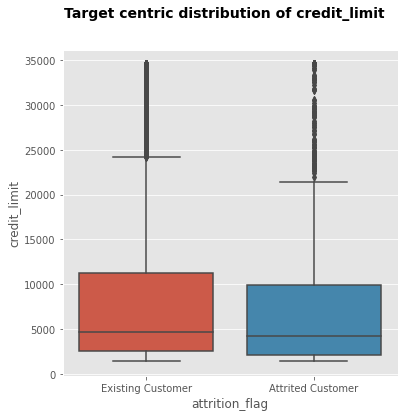

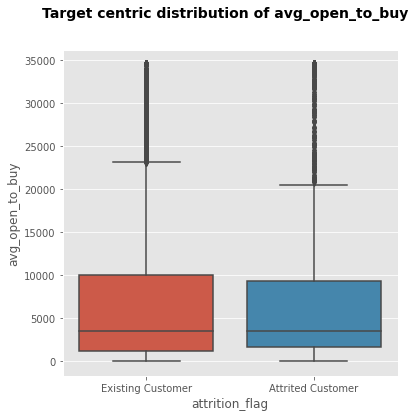

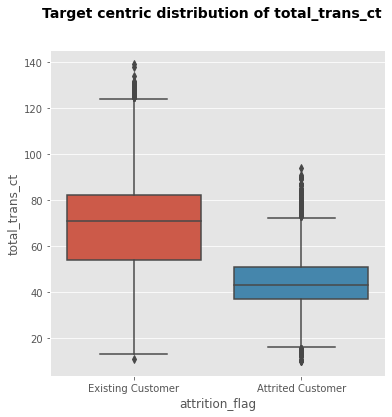

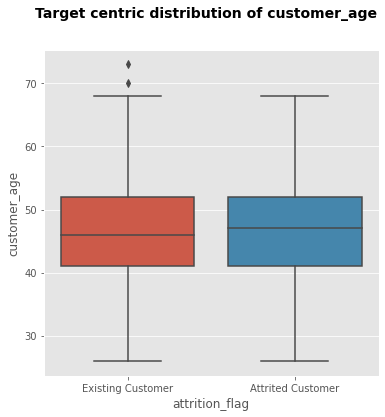

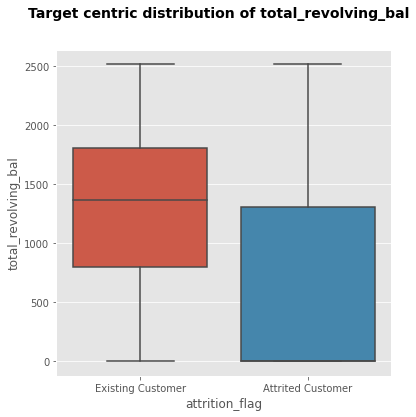

<IPython.core.display.Javascript object>

In [18]:
for numcol in numcols:
    target_centric_boxplot(churn, numcol)

- #### Drop the redundant columns of avg_open_to_buy

In [19]:
churn.drop(["avg_open_to_buy"], axis=1, inplace=True)
numcols.remove("avg_open_to_buy")

<IPython.core.display.Javascript object>

### Observations from EDA of numerical data

- Total_trans_ct is a combination of three different normal distribution. It has few outliers on right end.
    - Total_trans_amt has a strong correlation with Total_trans_ct
    - Total_trans_ct higher than 90 indicates a customer is highly likely an existing customer
    - Total_trans_ct of attrited customers is significantly lower than then existing customers
    
    
    
- Total_trans_amt has four distinct distrubutions with data in the following ranges: (a) 0 to 3000 (b) 3000 to 6000 (c) 7000 to 10000 (d) 12000 to 18000
    - It has a lot of outliers on the right end
    - Total_trans_amt of higher than 12000 indicates the customer is most likely to keep using the credit card
    - Total_trans_amt of attrited customers is significantly lower than then existing customers
    
    
    
- Customer_age is very close to normal distribution
    - It has few outliers on the right end
    - It has a strong correlation with months_on_book which is a logically acceptable
    - There is no significant difference between the ages of customers who attrited and who did not
    
    
    
- Total_revolving_bal seems to have a lot of cutomers at zero and rest follow a normal distribution
    - A large number of customers having zero total_revolving_bal means that most of the customers are paying their credit card bills by the end of the month
    - It has a strong correlation with avg_utilization_ratio as the more balance would be generated to be carried into next month if there is a higher utilization of the card
    - Customers who attrited have lower total_revolving_bal
    
    
    
- Avg_open_to_buy has right skewed distribution with a distinct peak around 32500
    - The credit_limit and avg_open_to_buy are very similar distributions, as indicated by the correlation value of 1. This means that one of these columns could be dropped.
    - The avg_utlization_ratio is inversely correlated with credit_limit, which is logical as higher credit limit lowers down the utlization ratio for same spending on the credit card
    - There is no significant difference in Avg_open_to_buy between customers who attrited and who didn't
    - Credit_limit of customers who attrited is slightly lower than the existing customers
        - Since credit_limit carries some more detailed information tan avg_open_to_buy, we will drop the avg_open_to_buy column


- Total_amt_chng_q4_q1 is almost a normal distribution with outliers on both ends
    - It has a significant correlation with total_ct_chng_q4_q1 larger number of transactions can lead to larger total_amt_chng_q4_q1
    - It is slightly lower for attrited customers


- Total_ct_chng_q4_q1 is almost a normal distribution with outliers on both ends
    - It is slightly lower for customers who have attrited


- Months_on_book is almost a normal distribution with outliers on both ends
    - It has a huge peak at around 35
    - There is no significant difference in months_on_book for attrited and existing customers


- Avg_utilization_ratio has almost two different distributions
    - There is a significant chunk of customers which do not spend any money using their credit card
    - The attrition is higher amongst these low credit card utilizing customers
    - It is much lower for customers who attrited

- ### EDA of categorical data

In [20]:
# function to create labeled barplots for categorical data
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.title("Countplot of " + feature, fontsize=15, fontweight="bold")
    ax.set(xlabel=None)
    plt.show()  # show the plot


# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45, fontsize=15)
    plt.show()

<IPython.core.display.Javascript object>

- #### Looping over all the categorical columns to show labeled barplots

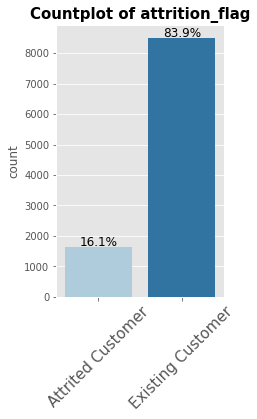

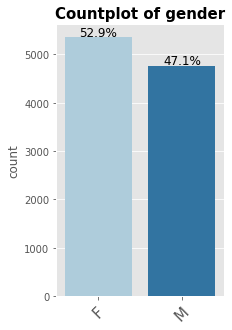

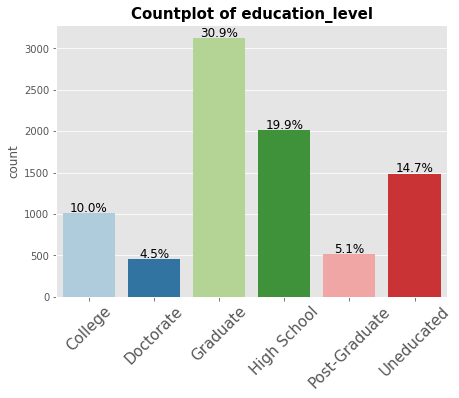

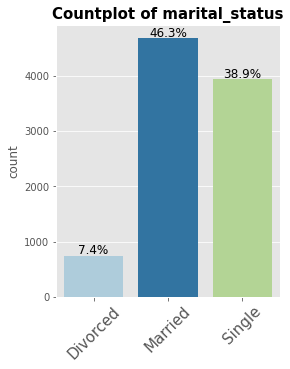

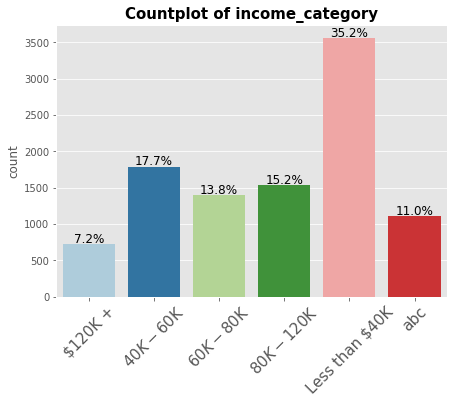

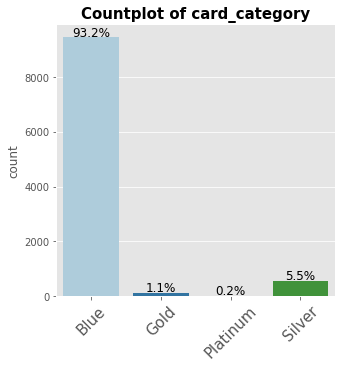

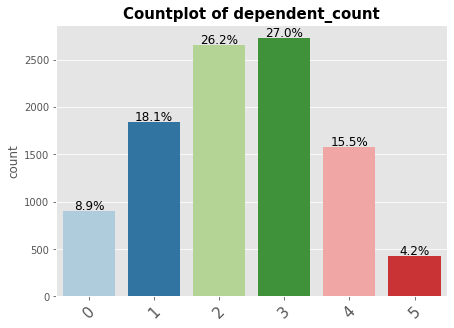

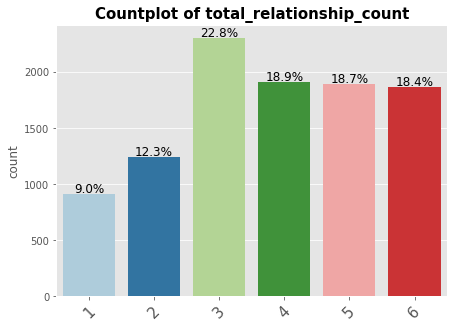

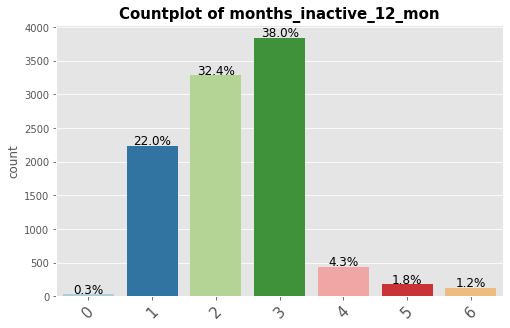

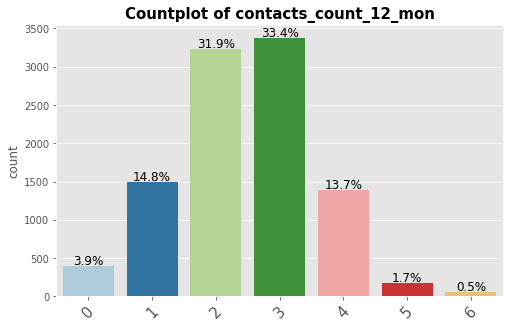

<IPython.core.display.Javascript object>

In [21]:
for catcol in catcols:
    labeled_barplot(churn, catcol, perc=True)

- #### Looping over all the numerical columns to show target centric countplot

attrition_flag     Attrited Customer  Existing Customer    All
attrition_flag                                                
Attrited Customer               1627                  0   1627
All                             1627               8500  10127
Existing Customer                  0               8500   8500
------------------------------------------------------------------------------------------------------------------------


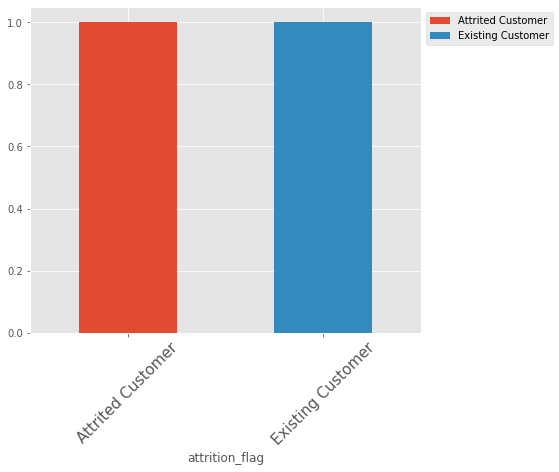

attrition_flag  Attrited Customer  Existing Customer    All
gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


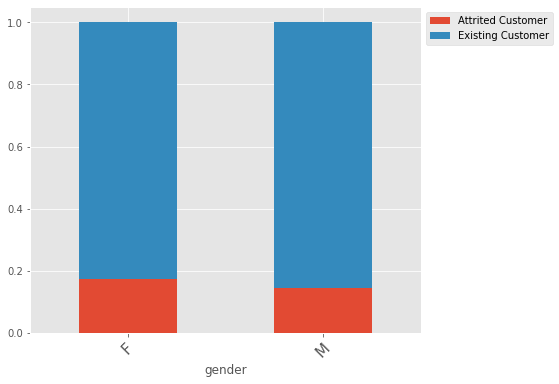

attrition_flag   Attrited Customer  Existing Customer   All
education_level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


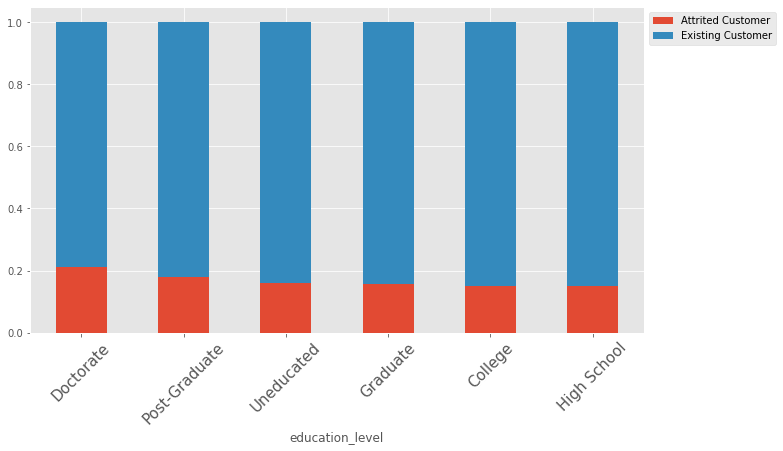

attrition_flag  Attrited Customer  Existing Customer   All
marital_status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


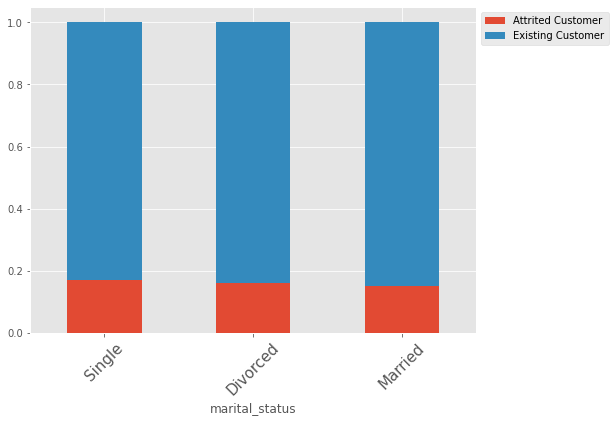

attrition_flag   Attrited Customer  Existing Customer    All
income_category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


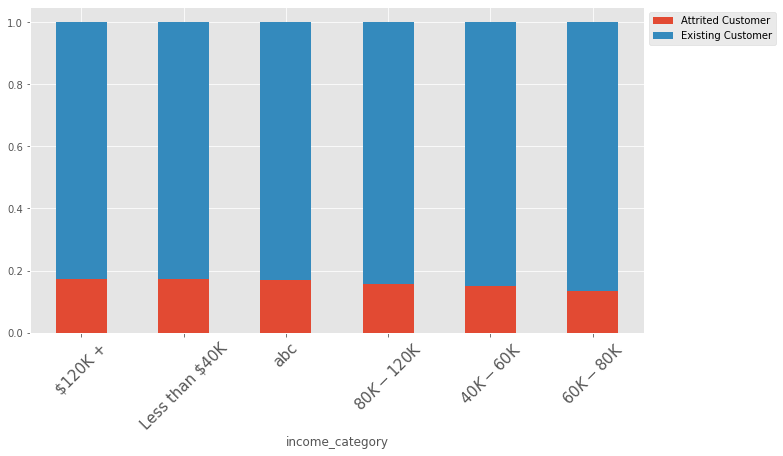

attrition_flag  Attrited Customer  Existing Customer    All
card_category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


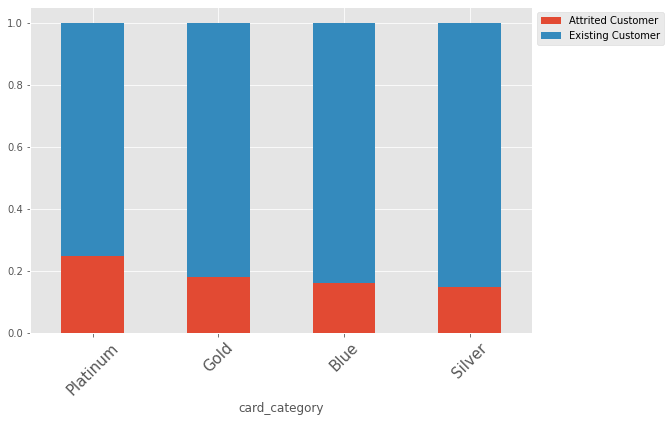

attrition_flag   Attrited Customer  Existing Customer    All
dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


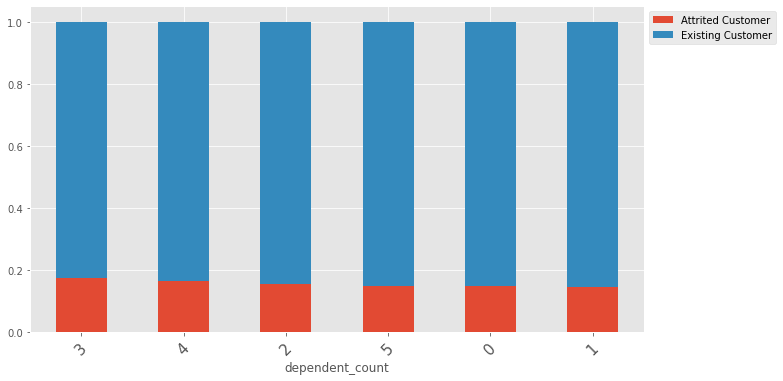

attrition_flag            Attrited Customer  Existing Customer    All
total_relationship_count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


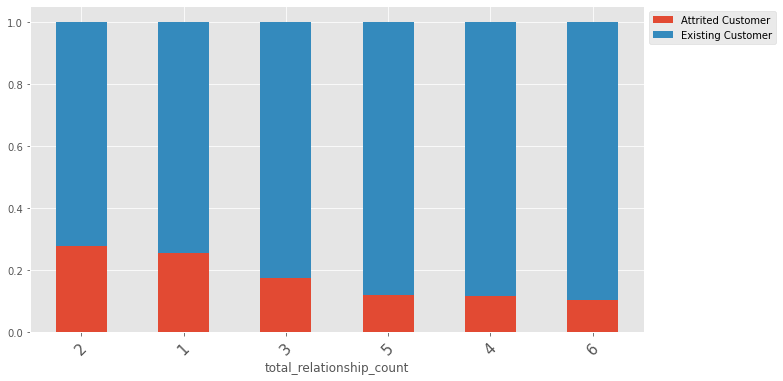

attrition_flag          Attrited Customer  Existing Customer    All
months_inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


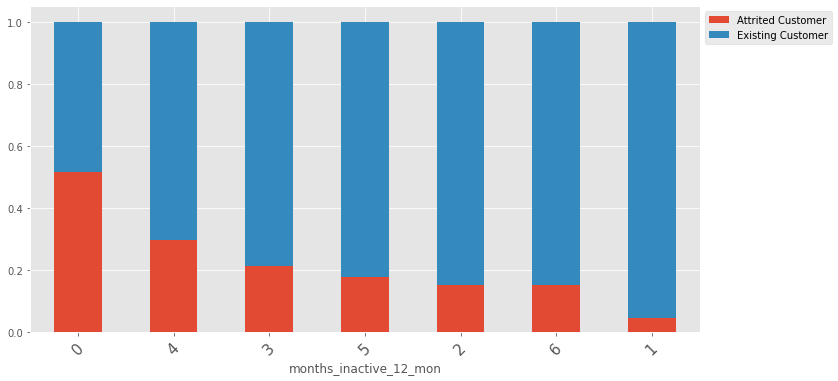

attrition_flag         Attrited Customer  Existing Customer    All
contacts_count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


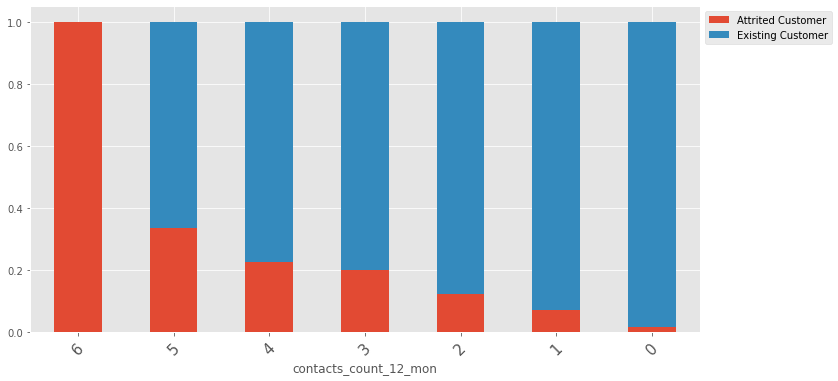

<IPython.core.display.Javascript object>

In [22]:
for catcol in catcols:
    stacked_barplot(churn, catcol, "attrition_flag")

### Observations on EDA of **categorical variables**

- The target variable attrition_flag is imbalanced with 16% records of attrited customers
- There are more female customers (53%) in the dataset than males
    - Also females have sligtly higher chance of attirting compared to males
- 31% customers have graduate level education
    - customers who have doctorate have a higher chance of attriting compared to any other education level
- 46% customers are married, followed by single and divorced
    - Single customers have a slightly higher tendency to attrite
- 35% of the customers belong to the income group of less than \\$40k
    - customers in the highest income group have the highest chance to attrite
    - there are 1112 entries which have values = 'abc' and hence will be imputed
- 93% of customers have Blue card
    - Platinum card users are the once who are the highest risk of attriting, but their data set is also very small
- 27% customers have 3 dependents followed by 2 (26%)
    - when the number of dependents is 3 the chances of attrition are highest
- 23% customers have a relationship_count of 3, followed by nearly 18% each of 4, 5 and 6
    - Fewer relationship_counts (1 and 2) can indicate a higher chance of attrition
- 38% of customers were inactive for 3 months
    - In general longer inactive months indicate higher chance of attrition
- The highest frequency of number of contact between bank and customers is 3 (33%) followed by 2 (32%)
    - higher contact count is indicating a higher risk of attrition

## Outlier identification and treatment 

Firstly we will identify which columns have significant number of outliers based on the %age data out of boxplot whisker range

In [23]:
## calculate the whisker values to identify outliers in the numerical data
Q1 = churn[numcols].quantile(0.25)
Q3 = churn[numcols].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR


def get_perc_outliers(data, feature, lower, upper):

    print(f"% data beyond upper and lower whiskers for {feature}\n")
    print(
        f"data below lower whisker = {100 * (data[data[feature] < lower].shape[0]) / data.shape[0]:.2f}%"
    )
    print(
        f"data beyond upper whisker = {100 * (data[data[feature] > upper].shape[0]) / data.shape[0]:.2f}%"
    )

    print("-" * 40, "\n")


for numcol in numcols:
    get_perc_outliers(churn, numcol, lower_whisker[numcol], upper_whisker[numcol])

% data beyond upper and lower whiskers for months_on_book

data below lower whisker = 1.86%
data beyond upper whisker = 1.96%
---------------------------------------- 

% data beyond upper and lower whiskers for total_trans_amt

data below lower whisker = 0.00%
data beyond upper whisker = 8.85%
---------------------------------------- 

% data beyond upper and lower whiskers for avg_utilization_ratio

data below lower whisker = 0.00%
data beyond upper whisker = 0.00%
---------------------------------------- 

% data beyond upper and lower whiskers for total_amt_chng_q4_q1

data below lower whisker = 0.47%
data beyond upper whisker = 3.44%
---------------------------------------- 

% data beyond upper and lower whiskers for total_ct_chng_q4_q1

data below lower whisker = 0.95%
data beyond upper whisker = 2.94%
---------------------------------------- 

% data beyond upper and lower whiskers for credit_limit

data below lower whisker = 0.00%
data beyond upper whisker = 9.72%
------------

<IPython.core.display.Javascript object>

- Credit_limit and total_trans_amt have highest amount of outlier data and it is on the right end of the distribution
- The total %age of outliers in rest of the cases are smaller (< 4%) and can be left the way they are
- Let us analyze Credit_limit and total_trans_amt one by one

- #### Credit_limit outlier analysis

In [24]:
churn[churn["credit_limit"] > upper_whisker["credit_limit"]]["credit_limit"].describe()

count     984.000
mean    31551.339
std      3764.074
min     23848.000
25%     28284.500
50%     34516.000
75%     34516.000
max     34516.000
Name: credit_limit, dtype: float64

<IPython.core.display.Javascript object>

In [25]:
churn[churn["credit_limit"] == 34516.000]["credit_limit"].value_counts()

34516.000    508
Name: credit_limit, dtype: int64

<IPython.core.display.Javascript object>

- There are more than 50% and to be precise 508 outliers which have credit limit 34516 and seems like it is a real limit.
- hence we will keep the outliers in the credit limit

- #### total_trans_amt outlier analysis

In [26]:
churn[churn["total_trans_amt"] > upper_whisker["total_trans_amt"]][
    ["total_trans_amt", "credit_limit"]
].describe()

total_trans_amt  credit_limit
count          896.000       896.000
mean         13770.194     14188.886
std           2302.446     10873.114
min           8620.000      2219.000
25%          13309.750      4652.250
50%          14379.500     10017.500
75%          15196.000     21177.250
max          18484.000     34516.000

<IPython.core.display.Javascript object>

- If we look at the outliers in the total_trans_amt, we realize that the mean of outlier group has a similar mean credit_limit 
- This is indicating that the higher total_trans_amt is due to the higher credit_limit
- Hence we will leave the outliers in total_trans_amt the way they are

## Missing value treatment 

We have identified following missing values in the dataset

1. Marital_Status has 749 missing values
2. Education_Level has 1519 missing values
3. Income_categoery has 1112 values as 'abc' and hence require replacement

- #### Replace 'abc' in income_category with np.nan and recheck the missing value count

In [27]:
churn["income_category"] = churn["income_category"].replace({"abc": np.nan})
churn.isnull().sum()

attrition_flag                 0
customer_age                   0
gender                         0
dependent_count                0
education_level             1519
marital_status               749
income_category             1112
card_category                  0
months_on_book                 0
total_relationship_count       0
months_inactive_12_mon         0
contacts_count_12_mon          0
credit_limit                   0
total_revolving_bal            0
total_amt_chng_q4_q1           0
total_trans_amt                0
total_trans_ct                 0
total_ct_chng_q4_q1            0
avg_utilization_ratio          0
dtype: int64

<IPython.core.display.Javascript object>

- #### Create KNN imputer to replace the missing value with 6 neighbors

In [28]:
knnimputer = KNNImputer(n_neighbors=6)
imputecols = ["income_category", "education_level", "marital_status"]

<IPython.core.display.Javascript object>

- Since KNNInputer uses Euclidian distance to impute, we will have to convert categorical variables to numerical values

- #### Mapping for converting categorical values to numerical values

In [29]:
# Manual encoding of categorical variables

# Encoding for attrition
attrition = {"Existing Customer": 0, "Attrited Customer": 1}
churn["attrition_flag"] = churn["attrition_flag"].map(attrition)

# Encoding for gender
gender = {"F": 1, "M": 2}
churn["gender"] = churn["gender"].map(gender)

# Encoding for marital status
marital = {"Married": 1, "Single": 2, "Divorced": 3}
churn["marital_status"] = churn["marital_status"].map(marital)

# Encoding for education level
education = {
    "Uneducated": 1,
    "High School": 2,
    "Graduate": 3,
    "College": 4,
    "Post-Graduate": 5,
    "Doctorate": 6,
}
churn["education_level"] = churn["education_level"].map(education)

# Encoding for income
income = {
    "Less than $40K": 1,
    "$40K - $60K": 2,
    "$60K - $80K": 3,
    "$80K - $120K": 4,
    "$120K +": 5,
}
churn["income_category"] = churn["income_category"].map(income)

# Encoding for card_type
card = {"Blue": 1, "Silver": 2, "Gold": 3, "Platinum": 4}
churn["card_category"] = churn["card_category"].map(card)

<IPython.core.display.Javascript object>

- #### Imputing missing data in the listed cols using KNN imputer

In [30]:
churn[imputecols] = knnimputer.fit_transform(churn[imputecols])

<IPython.core.display.Javascript object>

In [31]:
# check the missing data
churn.isnull().sum()

attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

<IPython.core.display.Javascript object>

- #### Inverting numerical encoding back to original values

In [32]:
## Invert the encoding back to the original values
def invert_encoding(num_encode, feature):
    inv_encode = {v: k for k, v in num_encode.items()}
    churn[feature] = np.round(churn[feature]).map(inv_encode).astype("category")


invert_encoding(card, "card_category")
invert_encoding(income, "income_category")
invert_encoding(education, "education_level")
invert_encoding(marital, "marital_status")
invert_encoding(gender, "gender")

<IPython.core.display.Javascript object>

## Splitting dataset, oversampled and undersampled training sets

Here we will split our dataset into train test and validation sets

In [33]:
# Separating target column from the predictors
X = churn.drop("attrition_flag", axis=1)
Y = churn["attrition_flag"]

# Create dummies for the categorical predictors
X = pd.get_dummies(X, drop_first=True)

# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, Y_temp, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, Y_train, Y_val = train_test_split(
    X_temp, Y_temp, test_size=0.25, random_state=1, stratify=Y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 28) (2026, 28) (2026, 28)


<IPython.core.display.Javascript object>

- ### Oversampling train data using SMOTE

In [34]:
print("Before Oversampling, counts of label 'Attrited': {}".format(sum(Y_train == 1)))
print(
    "Before Oversampling, counts of label 'Existing': {} \n".format(sum(Y_train == 0))
)

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, Y_train_over = sm.fit_resample(X_train, Y_train)


print(
    "After Oversampling, counts of label 'Attrited': {}".format(sum(Y_train_over == 1))
)
print(
    "After Oversampling, counts of label 'Existing': {} \n".format(
        sum(Y_train_over == 0)
    )
)


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(Y_train_over.shape))

Before Oversampling, counts of label 'Attrited': 976
Before Oversampling, counts of label 'Existing': 5099 

After Oversampling, counts of label 'Attrited': 5099
After Oversampling, counts of label 'Existing': 5099 

After Oversampling, the shape of train_X: (10198, 28)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

- ### Undersampling train data using RUS

In [35]:
print("Before Under Sampling, counts of label 'Attrited': {}".format(sum(Y_train == 1)))
print(
    "Before Under Sampling, counts of label 'Existing': {} \n".format(sum(Y_train == 0))
)

rus = RandomUnderSampler(random_state=1)  # Undersample dependent variable
X_train_under, Y_train_under = rus.fit_resample(X_train, Y_train)

print(
    "After Under Sampling, counts of label 'Attrited': {}".format(
        sum(Y_train_under == 1)
    )
)
print(
    "After Under Sampling, counts of label 'Existing': {} \n".format(
        sum(Y_train_under == 0)
    )
)

print("After Under Sampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(Y_train_under.shape))

Before Under Sampling, counts of label 'Attrited': 976
Before Under Sampling, counts of label 'Existing': 5099 

After Under Sampling, counts of label 'Attrited': 976
After Under Sampling, counts of label 'Existing': 976 

After Under Sampling, the shape of train_X: (1952, 28)
After Under Sampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

## **Model Buliding**

### Model evaluation criterion

### Model can make wrong predictions as:
 
1. A customer who drops the credit card but the algorithm says they won't, then the bank loses an existing customer and hence business.

2. A customer who doesn't cancel the credit card but the algorithm says they will, then the bank loses some resources in offering those customers to stay and hence looses some resources cost. 

### Which case is more important? 

* The case when the customer drops the credit card but the algorithm says they won't is a more crucial number to minimize.
* Hence False Negatives need to be minimized
* Recall needs to be maximized

### How to reduce this loss i.e need to reduce False Negatives?
*  `Recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_metrics_score function will be used to check the model performance of models on test and training datasets
* The make_confusion_matrix function will be used to plot confusion matrix
* Create empty lists to model information

In [36]:
## Function to create confusion matrix
def make_confusion_matrix(model, X, y_actual, titletext, labels=[1, 0]):
    y_predict = model.predict(X)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - Existing", "Actual - Attrited"]],
        columns=[i for i in ["Predicted - Existing", "Predicted - Attrited"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(7, 5))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="rocket_r")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(titletext, fontsize=15)

<IPython.core.display.Javascript object>

In [37]:
## defining empty lists to add train and test results
model_name = []

acc_train = []
acc_val = []
acc_test = []

recall_train = []
recall_val = []
recall_test = []

precision_train = []
precision_val = []
precision_test = []

f1_train = []
f1_val = []
f1_test = []

<IPython.core.display.Javascript object>

In [38]:
def get_metrics_score(
    model,
    modelname,
    X_train_in,
    X_val_in,
    X_test_in,
    Y_train_in,
    Y_val_in,
    Y_test_in,
    show_test,
):

    # Generate the predictions
    pred_train = np.round(model.predict(X_train_in))
    pred_val = np.round(model.predict(X_val_in))
    pred_test = np.round(model.predict(X_test_in))

    # Generate the metrics based on actual values and predictions #

    ## Accuracy ##
    train_acc = accuracy_score(Y_train_in, pred_train)
    val_acc = accuracy_score(Y_val_in, pred_val)
    test_acc = accuracy_score(Y_test_in, pred_test)

    ## Recall ##
    train_recall = recall_score(Y_train_in, pred_train)
    val_recall = recall_score(Y_val_in, pred_val)
    test_recall = recall_score(Y_test_in, pred_test)

    ## Precision ##
    train_precision = precision_score(Y_train_in, pred_train)
    val_precision = precision_score(Y_val_in, pred_val)
    test_precision = precision_score(Y_test_in, pred_test)

    ## F1 Score ##
    train_f1 = f1_score(Y_train_in, pred_train)
    val_f1 = f1_score(Y_val_in, pred_val)
    test_f1 = f1_score(Y_test_in, pred_test)

    # Append all the model details in the global arrays #

    ## add model name to the global array ##
    model_name.append(modelname)

    ## add accuracy data to the global array ##
    acc_train.append(train_acc)
    acc_val.append(val_acc)
    acc_test.append(test_acc)

    ## add recall data to the global array ##
    recall_train.append(train_recall)
    recall_val.append(val_recall)
    recall_test.append(test_recall)

    ## add precision data to the global array ##
    precision_train.append(train_precision)
    precision_val.append(val_precision)
    precision_test.append(test_precision)

    ## add F1 score data to the global array ##
    f1_train.append(train_f1)
    f1_val.append(val_f1)
    f1_test.append(test_f1)

    ## Create a list of metric names ##
    if show_test:
        metrics = [
            "Model_Name",
            "Train_Accuracy",
            "Validation_Accuracy",
            "Test_Accuracy",
            "Train_Recall",
            "Validation_Recall",
            "Test_Recall",
            "Train_Precision",
            "Validation_Precision",
            "Test_Precision",
            "Train_F1-Score",
            "Validation_F1-Score",
            "Test_F1-Score",
        ]
    else:
        metrics = [
            "Model_Name",
            "Train_Accuracy",
            "Validation_Accuracy",
            "Train_Recall",
            "Validation_Recall",
            "Train_Precision",
            "Validation_Precision",
            "Train_F1-Score",
            "Validation_F1-Score",
        ]
    ## Create a list of the corresponding values of the metrics ##
    if show_test:
        scores = [
            modelname,
            train_acc,
            val_acc,
            test_acc,
            train_recall,
            val_recall,
            test_recall,
            train_precision,
            val_precision,
            test_precision,
            train_f1,
            val_f1,
            test_f1,
        ]
    else:
        scores = [
            modelname,
            train_acc,
            val_acc,
            train_recall,
            val_recall,
            train_precision,
            val_precision,
            train_f1,
            val_f1,
        ]
    ## Create column names ##
    cols = ["Metric", "Score"]

    metric_score_tuple = [(name, val) for name, val in zip(metrics, scores)]

    display(
        pd.DataFrame.from_records(metric_score_tuple, columns=cols, index="Metric").T
    )
    # display confusion matrix
    make_confusion_matrix(model, X_train_in, Y_train_in, "Confusion Matrix for Train")
    make_confusion_matrix(model, X_val_in, Y_val_in, "Confusion Matrix for Validation")

    if show_test:
        make_confusion_matrix(model, X_test_in, Y_test_in, "Confusion Matrix for Test")

<IPython.core.display.Javascript object>

- ### Models trained on training data

- #### Logistic Regression

Here we will build basic logistic regression model with standard scaler

Metric          Model_Name Train_Accuracy Validation_Accuracy Train_Recall  \
Score   LogisticRegression          0.902               0.913        0.574   

Metric Validation_Recall Train_Precision Validation_Precision Train_F1-Score  \
Score              0.613           0.756                0.797          0.652   

Metric Validation_F1-Score  
Score                0.693

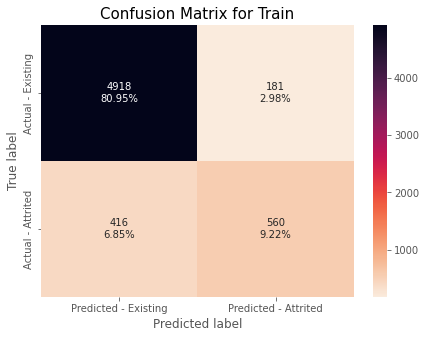

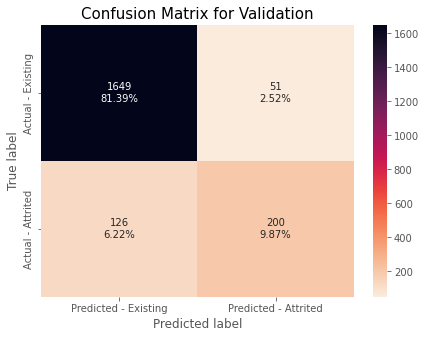

<IPython.core.display.Javascript object>

In [39]:
# Create a pipeline
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))

# Fit on train data
pipe_lr.fit(X_train, Y_train)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_lr, "LogisticRegression", X_train, X_val, X_test, Y_train, Y_val, Y_test, False
)

- This basic model is underfitting as the train recall is around 0.6 and so is validatation recall
- This recall value is low so we try to improve this logitic regression model

- #### Decision Tree classifier

Here we will build a basic decision tree model with standard scaler

Metric    Model_Name Train_Accuracy Validation_Accuracy Train_Recall  \
Score   DecisionTree          1.000               0.938        1.000   

Metric Validation_Recall Train_Precision Validation_Precision Train_F1-Score  \
Score              0.813           1.000                0.803          1.000   

Metric Validation_F1-Score  
Score                0.808

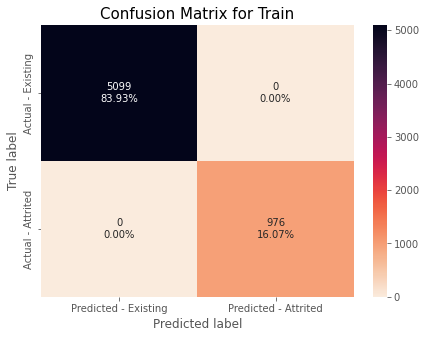

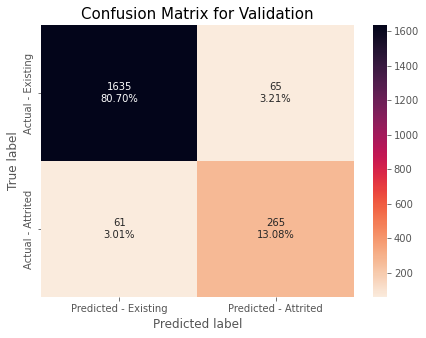

<IPython.core.display.Javascript object>

In [40]:
# Create a pipeline
pipe_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1),)

# Fit on train data
pipe_dt.fit(X_train, Y_train)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_dt, "DecisionTree", X_train, X_val, X_test, Y_train, Y_val, Y_test, False
)

- The Decision Tree classifier does a better job than logitic regression
- It is overfitting as decision trees usually do in an unconstrained environment

- #### Random Forest classifier

Here we will build a basic Random forest classifier model with standard scaler

Metric    Model_Name Train_Accuracy Validation_Accuracy Train_Recall  \
Score   RandomForest          1.000               0.958        1.000   

Metric Validation_Recall Train_Precision Validation_Precision Train_F1-Score  \
Score              0.801           1.000                0.929          1.000   

Metric Validation_F1-Score  
Score                0.860

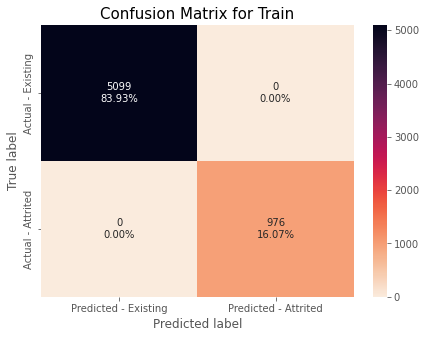

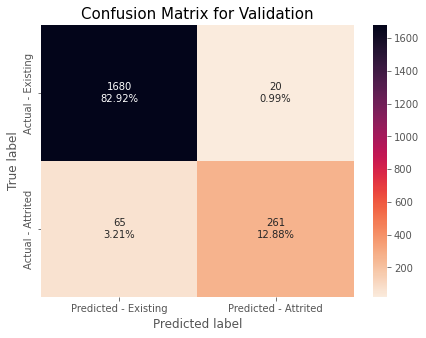

<IPython.core.display.Javascript object>

In [41]:
# Create a pipeline
pipe_rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1),)

# Fit on train data
pipe_rf.fit(X_train, Y_train)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_rf, "RandomForest", X_train, X_val, X_test, Y_train, Y_val, Y_test, False
)

- The Random Forest classifier does a better job than logitic regression and slightly poor than Decision Tree classifier
- It is overfitting on the training data

- #### Bagging classifier

Here we will build a basic Bagging Classifier model with standard scaler

Metric         Model_Name Train_Accuracy Validation_Accuracy Train_Recall  \
Score   BaggingClassifier          0.997               0.957        0.987   

Metric Validation_Recall Train_Precision Validation_Precision Train_F1-Score  \
Score              0.819           0.997                0.902          0.992   

Metric Validation_F1-Score  
Score                0.859

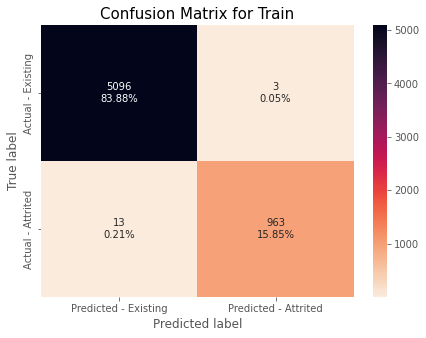

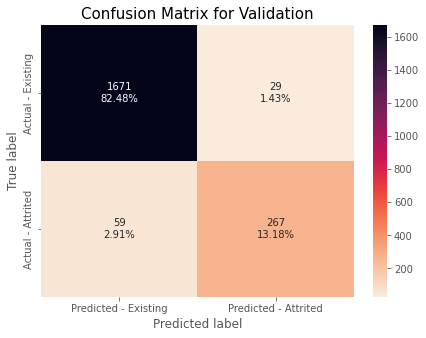

<IPython.core.display.Javascript object>

In [42]:
# Create a pipeline
pipe_bc = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1),)

# Fit on train data
pipe_bc.fit(X_train, Y_train)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_bc, "BaggingClassifier", X_train, X_val, X_test, Y_train, Y_val, Y_test, False
)

- The Bagging classifier does a better job so far as it's recall is not exactly one as seen in some of the previous models
- It is still overfitting and needs to be improved

- #### Gradient Boosting classifier

Here we will build a basic Gradient Boosting classifier with standard scaler

Metric                  Model_Name Train_Accuracy Validation_Accuracy  \
Score   GradientBoostingClassifier          0.973               0.970   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         0.875             0.868           0.954                0.940   

Metric Train_F1-Score Validation_F1-Score  
Score           0.913               0.903

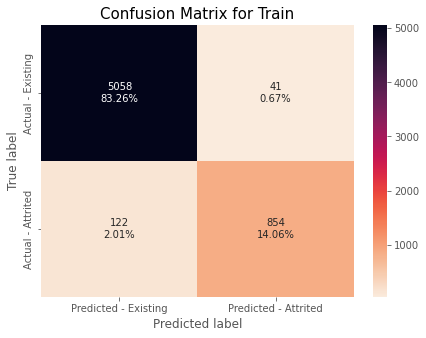

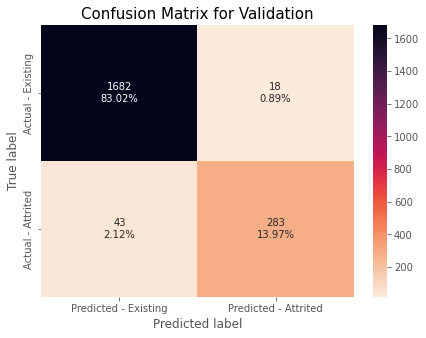

<IPython.core.display.Javascript object>

In [43]:
# Create a pipeline
pipe_gbc = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1),)

# Fit on train data
pipe_gbc.fit(X_train, Y_train)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_gbc,
    "GradientBoostingClassifier",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The Gradient Boosting Classifier does a very good job as the recall on train and validation sets is very close and is the highets of all the models so far
- It can be further improved to increase the recall

- #### Adaboost Classifier

Here we will build a basic Adaboost classifier with standard scaler

Metric          Model_Name Train_Accuracy Validation_Accuracy Train_Recall  \
Score   AdaBoostClassifier          0.960               0.960        0.849   

Metric Validation_Recall Train_Precision Validation_Precision Train_F1-Score  \
Score              0.859           0.894                0.889          0.871   

Metric Validation_F1-Score  
Score                0.874

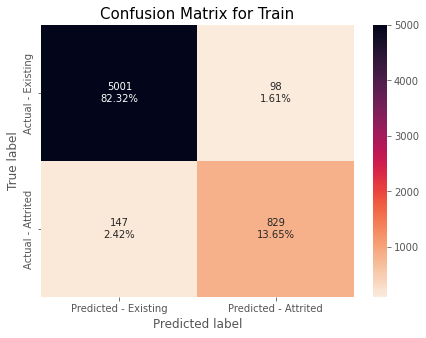

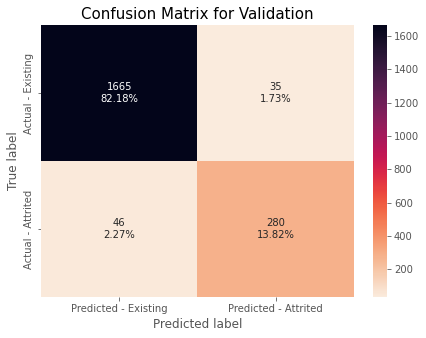

<IPython.core.display.Javascript object>

In [44]:
# Create a pipeline
pipe_abc = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1),)

# Fit on train data
pipe_abc.fit(X_train, Y_train)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_abc,
    "AdaBoostClassifier",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The AdaBoost Classifier does a very good job as the recall on train and validation sets is very close and is very similar to Gradient Boost
- It can be further improved to increase the recall

- #### XGBoost classifier

Here we will build a basic XGBoost classifier with standard scaler

Metric         Model_Name Train_Accuracy Validation_Accuracy Train_Recall  \
Score   XGBoostClassifier          0.973               0.970        0.875   

Metric Validation_Recall Train_Precision Validation_Precision Train_F1-Score  \
Score              0.868           0.954                0.940          0.913   

Metric Validation_F1-Score  
Score                0.903

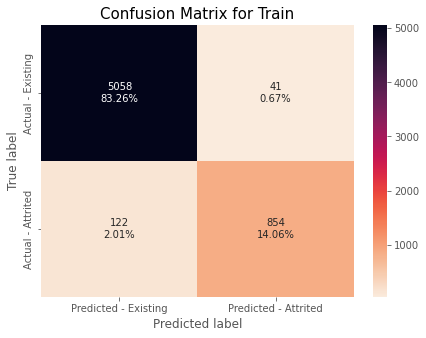

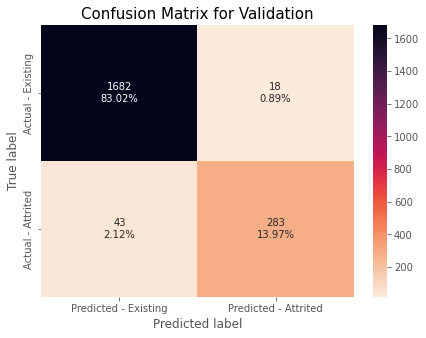

<IPython.core.display.Javascript object>

In [45]:
# Create a pipeline
pipe_xgbc = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1),)

# Fit on train data
pipe_xgbc.fit(X_train, Y_train)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_xgbc,
    "XGBoostClassifier",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The XGBoost Classifier does a very good job as the recall on train and validation sets is very close and is very similar to other boosting classifiers
- It can be further improved to increase the recall

- ### Models trained on Oversampled Training Data

- #### Logistic Regression

Here we will build basic logistic regression model with standard scaler trained on oversampled data

Metric                      Model_Name Train_Accuracy Validation_Accuracy  \
Score   LogisticRegression_oversampled          0.881               0.885   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         0.663             0.699           0.623                0.626   

Metric Train_F1-Score Validation_F1-Score  
Score           0.643               0.661

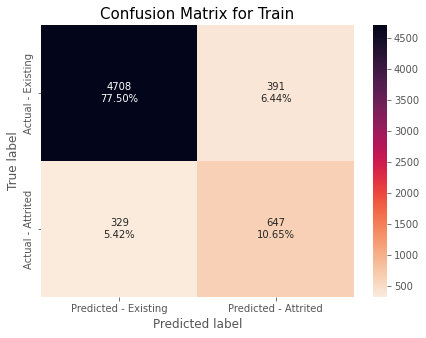

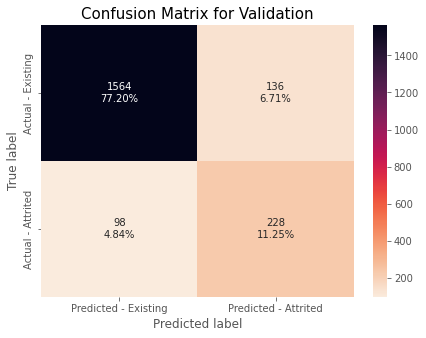

<IPython.core.display.Javascript object>

In [46]:
# Create a pipeline
pipe_lr_over = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))

# Fit on train data
pipe_lr_over.fit(X_train_over, Y_train_over)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_lr_over,
    "LogisticRegression_oversampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- This model is underfitting

- #### Decision Tree classifier

Here we will build a basic decision tree model with standard scaler trained on oversampled data

Metric                Model_Name Train_Accuracy Validation_Accuracy  \
Score   DecisionTree_oversampled          1.000               0.939   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         1.000             0.853           1.000                0.785   

Metric Train_F1-Score Validation_F1-Score  
Score           1.000               0.818

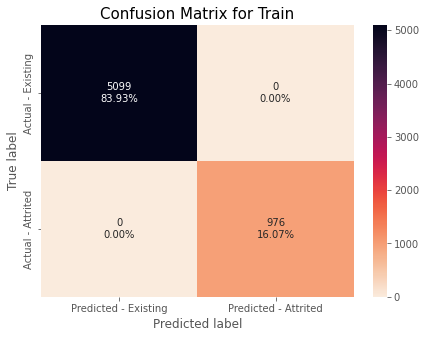

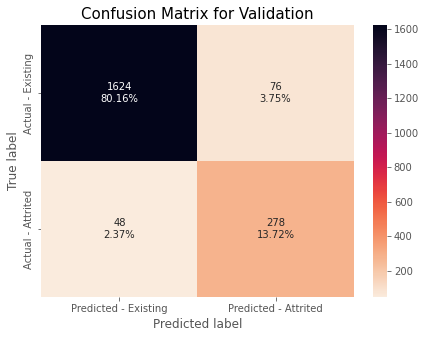

<IPython.core.display.Javascript object>

In [47]:
# Create a pipeline
pipe_dt_over = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1),)

# Fit on train data
pipe_dt_over.fit(X_train_over, Y_train_over)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_dt_over,
    "DecisionTree_oversampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The Decision Tree classifier does a better job than logitic regression
- It is overfitting as decision trees usually do in an unconstrained environment

- #### Random Forest classifier

Here we will build a basic Random forest classifier model with standard scaler trained on oversampled data

Metric                Model_Name Train_Accuracy Validation_Accuracy  \
Score   RandomForest_oversampled          1.000               0.955   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         1.000             0.868           1.000                0.855   

Metric Train_F1-Score Validation_F1-Score  
Score           1.000               0.861

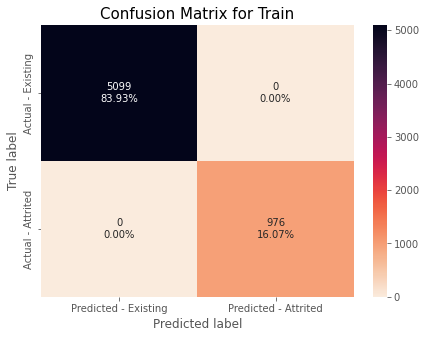

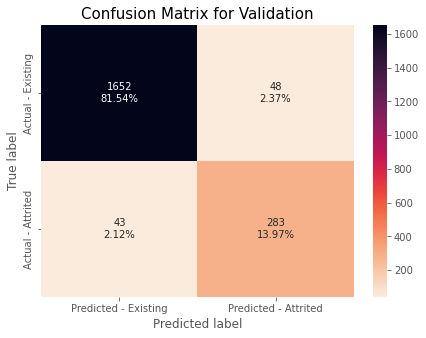

<IPython.core.display.Javascript object>

In [48]:
# Create a pipeline
pipe_rf_over = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1),)

# Fit on train data
pipe_rf_over.fit(X_train_over, Y_train_over)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_rf_over,
    "RandomForest_oversampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The Random Forest classifier does a better job than logistic regression and slightly better than Decision Tree classifier
- It is overfitting on the training data

- #### Bagging classifier

Here we will build a basic Bagging Classifier model with standard scaler trained on oversampled data

Metric                     Model_Name Train_Accuracy Validation_Accuracy  \
Score   BaggingClassifier_oversampled          0.999               0.952   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         0.998             0.883           0.993                0.830   

Metric Train_F1-Score Validation_F1-Score  
Score           0.995               0.856

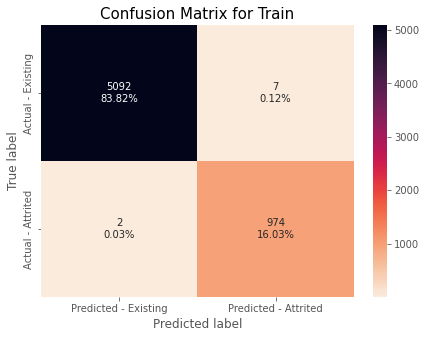

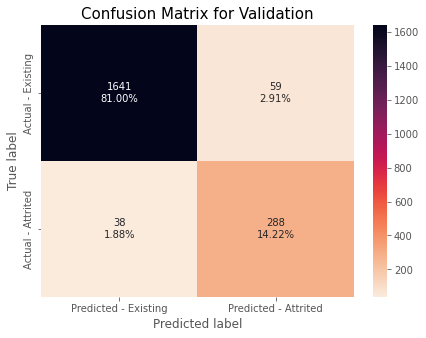

<IPython.core.display.Javascript object>

In [49]:
# Create a pipeline
pipe_bc_over = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1),)

# Fit on train data
pipe_bc_over.fit(X_train_over, Y_train_over)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_bc_over,
    "BaggingClassifier_oversampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The Bagging classifier is overfitting and needs to be improved

- #### Gradient Boosting classifier

Here we will build a basic Gradient Boosting classifier with standard scaler trained on oversampled data

Metric                              Model_Name Train_Accuracy  \
Score   GradientBoostingClassifier_oversampled          0.968   

Metric Validation_Accuracy Train_Recall Validation_Recall Train_Precision  \
Score                0.955        0.930             0.896           0.878   

Metric Validation_Precision Train_F1-Score Validation_F1-Score  
Score                 0.837          0.903               0.865

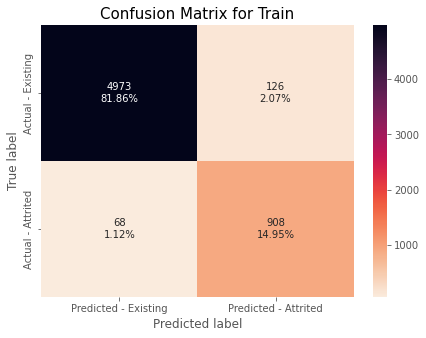

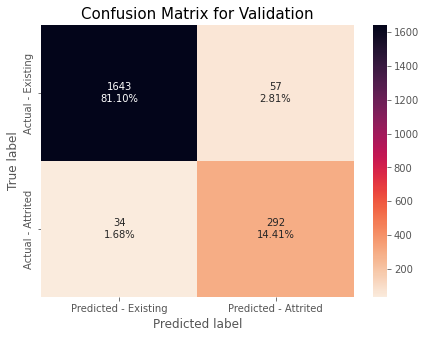

<IPython.core.display.Javascript object>

In [50]:
# Create a pipeline
pipe_gbc_over = make_pipeline(
    StandardScaler(), GradientBoostingClassifier(random_state=1),
)

# Fit on train data
pipe_gbc_over.fit(X_train_over, Y_train_over)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_gbc_over,
    "GradientBoostingClassifier_oversampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The Gradient Boosting Classifier is overfitting on the training data

- #### Adaboost Classifier

Here we will build a basic Adaboost classifier with standard scaler trained on oversampled data

Metric                      Model_Name Train_Accuracy Validation_Accuracy  \
Score   AdaBoostClassifier_oversampled          0.947               0.947   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         0.887             0.893           0.803                0.802   

Metric Train_F1-Score Validation_F1-Score  
Score           0.843               0.845

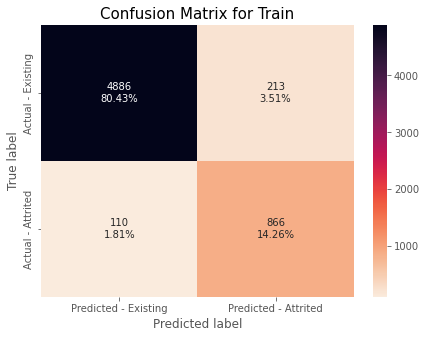

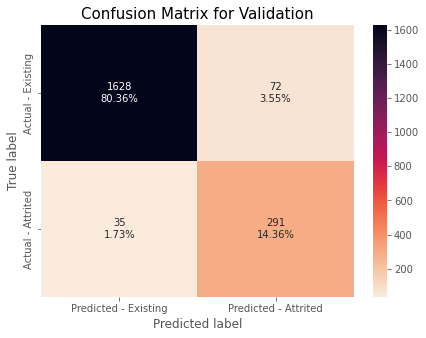

<IPython.core.display.Javascript object>

In [51]:
# Create a pipeline
pipe_abc_over = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1),)

# Fit on train data
pipe_abc_over.fit(X_train_over, Y_train_over)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_abc_over,
    "AdaBoostClassifier_oversampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The AdaBoost Classifier is doing pretty good and not overfitting

- #### XGBoost classifier

Here we will build a basic XGBoost classifier with standard scaler trained on oversampled data

Metric                     Model_Name Train_Accuracy Validation_Accuracy  \
Score   XGBoostClassifier_oversampled          0.968               0.955   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         0.930             0.896           0.878                0.837   

Metric Train_F1-Score Validation_F1-Score  
Score           0.903               0.865

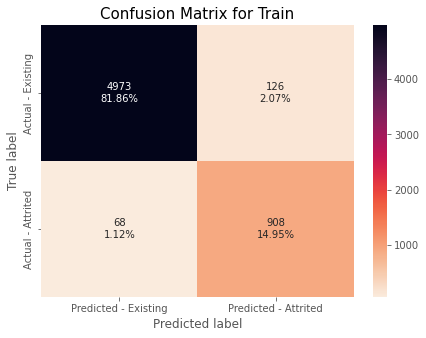

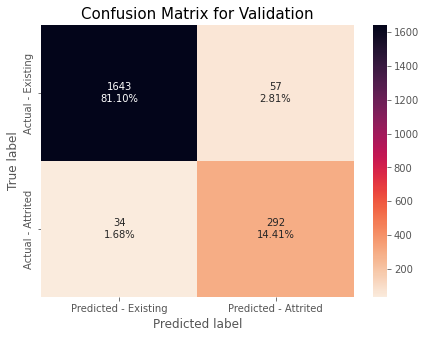

<IPython.core.display.Javascript object>

In [52]:
# Create a pipeline
pipe_xgbc_over = make_pipeline(
    StandardScaler(), GradientBoostingClassifier(random_state=1),
)

# Fit on train data
pipe_xgbc_over.fit(X_train_over, Y_train_over)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_xgbc_over,
    "XGBoostClassifier_oversampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The XGBoost Classifier is overfitting on training data

- ### Models trained on undersampled Training Data

- #### Logistic Regression

Here we will build basic logistic regression model with standard scaler trained on undersampled data

Metric                       Model_Name Train_Accuracy Validation_Accuracy  \
Score   LogisticRegression_undersampled          0.841               0.853   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         0.848             0.871           0.503                0.527   

Metric Train_F1-Score Validation_F1-Score  
Score           0.631               0.657

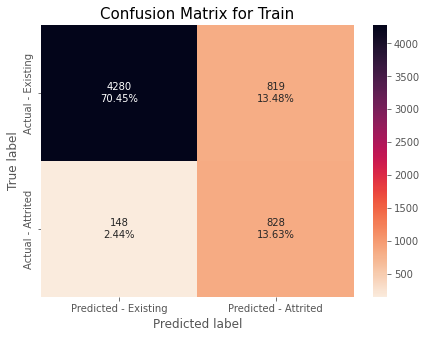

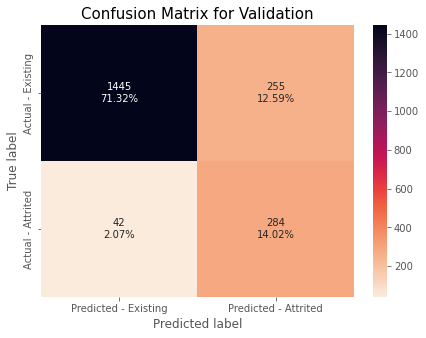

<IPython.core.display.Javascript object>

In [53]:
# Create a pipeline
pipe_lr_under = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))

# Fit on train data
pipe_lr_under.fit(X_train_under, Y_train_under)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_lr_under,
    "LogisticRegression_undersampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- This model is doing a really good job of predicitng on validation set

- #### Decision Tree classifier

Here we will build a basic decision tree model with standard scaler trained on undersampled data

Metric                 Model_Name Train_Accuracy Validation_Accuracy  \
Score   DecisionTree_undersampled          0.919               0.889   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         1.000             0.905           0.664                0.605   

Metric Train_F1-Score Validation_F1-Score  
Score           0.798               0.725

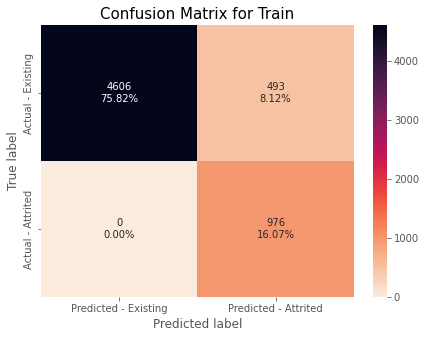

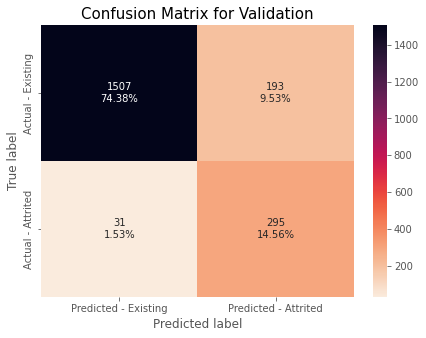

<IPython.core.display.Javascript object>

In [54]:
# Create a pipeline
pipe_dt_under = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1),)

# Fit on train data
pipe_dt_under.fit(X_train_under, Y_train_under)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_dt_under,
    "DecisionTree_undersampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The Decision Tree classifier is overfitting

- #### Random Forest classifier

Here we will build a basic Random forest classifier model with standard scaler trained on undersampled data

Metric                 Model_Name Train_Accuracy Validation_Accuracy  \
Score   RandomForest_undersampled          0.948               0.930   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         1.000             0.929           0.757                0.718   

Metric Train_F1-Score Validation_F1-Score  
Score           0.862               0.810

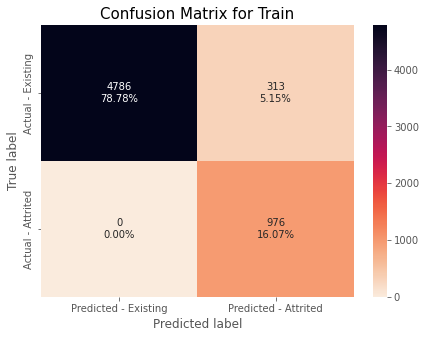

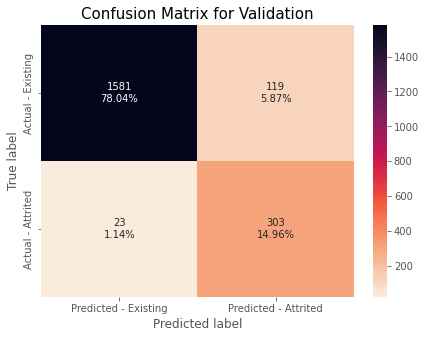

<IPython.core.display.Javascript object>

In [55]:
# Create a pipeline
pipe_rf_under = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1),)

# Fit on train data
pipe_rf_under.fit(X_train_under, Y_train_under)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_rf_under,
    "RandomForest_undersampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The Random Forest classifier is overfitting on the training data

- #### Bagging classifier

Here we will build a basic Bagging Classifier model with standard scaler trained on undersampled data

Metric                      Model_Name Train_Accuracy Validation_Accuracy  \
Score   BaggingClassifier_undersampled          0.945               0.927   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         0.993             0.917           0.749                0.712   

Metric Train_F1-Score Validation_F1-Score  
Score           0.854               0.802

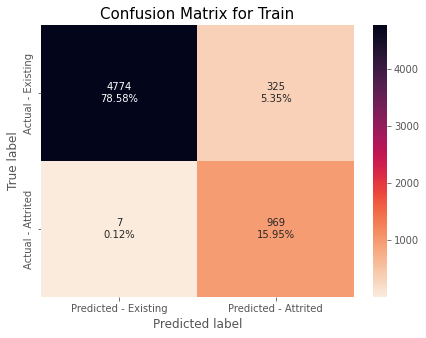

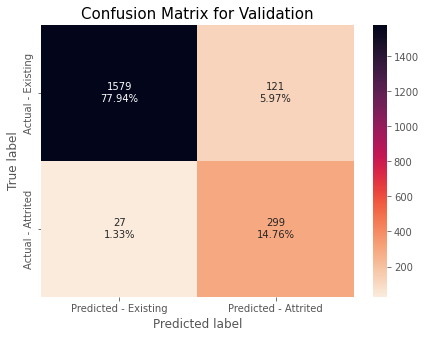

<IPython.core.display.Javascript object>

In [56]:
# Create a pipeline
pipe_bc_under = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1),)

# Fit on train data
pipe_bc_under.fit(X_train_under, Y_train_under)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_bc_under,
    "BaggingClassifier_undersampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The Bagging classifier is overfitting and needs to be improved

- #### Gradient Boosting classifier

Here we will build a basic Gradient Boosting classifier with standard scaler trained on undersampled data

Metric                               Model_Name Train_Accuracy  \
Score   GradientBoostingClassifier_undersampled          0.945   

Metric Validation_Accuracy Train_Recall Validation_Recall Train_Precision  \
Score                0.940        0.982             0.963           0.751   

Metric Validation_Precision Train_F1-Score Validation_F1-Score  
Score                 0.741          0.851               0.837

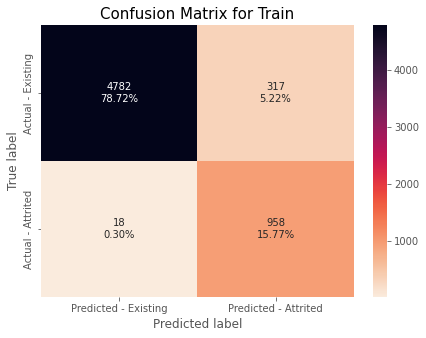

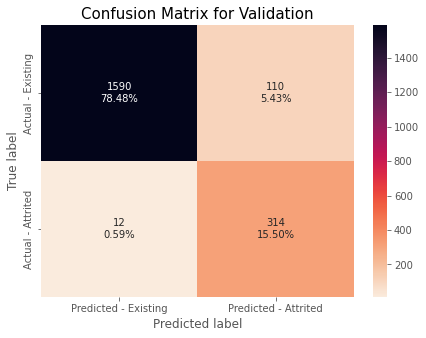

<IPython.core.display.Javascript object>

In [57]:
# Create a pipeline
pipe_gbc_under = make_pipeline(
    StandardScaler(), GradientBoostingClassifier(random_state=1),
)

# Fit on train data
pipe_gbc_under.fit(X_train_under, Y_train_under)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_gbc_under,
    "GradientBoostingClassifier_undersampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The Gradient Boosting Classifier is slightly overfitting on the training data

- #### Adaboost Classifier

Here we will build a basic Adaboost classifier with standard scaler trained on undersampled data

Metric                       Model_Name Train_Accuracy Validation_Accuracy  \
Score   AdaBoostClassifier_undersampled          0.932               0.933   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         0.954             0.969           0.716                0.717   

Metric Train_F1-Score Validation_F1-Score  
Score           0.818               0.824

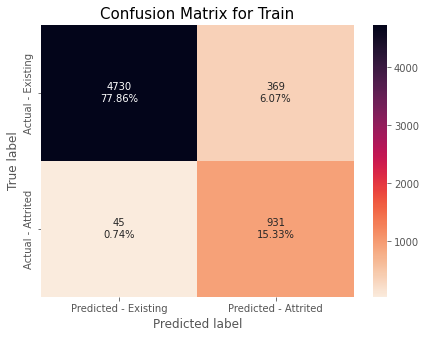

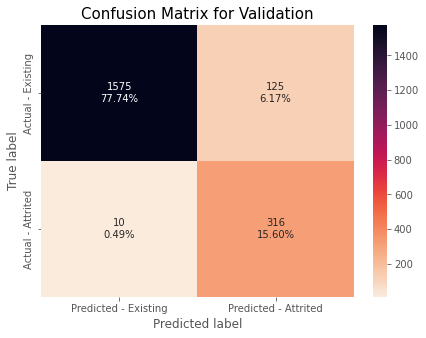

<IPython.core.display.Javascript object>

In [58]:
# Create a pipeline
pipe_abc_under = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1),)

# Fit on train data
pipe_abc_under.fit(X_train_under, Y_train_under)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_abc_under,
    "AdaBoostClassifier_undersampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The AdaBoost Classifier is performing really well with training on undersampled data

- #### XGBoost classifier

Here we will build a basic XGBoost classifier with standard scaler trained on undersampled data

Metric                      Model_Name Train_Accuracy Validation_Accuracy  \
Score   XGBoostClassifier_undersampled          0.959               0.945   

Metric Train_Recall Validation_Recall Train_Precision Validation_Precision  \
Score         1.000             0.969           0.797                0.756   

Metric Train_F1-Score Validation_F1-Score  
Score           0.887               0.849

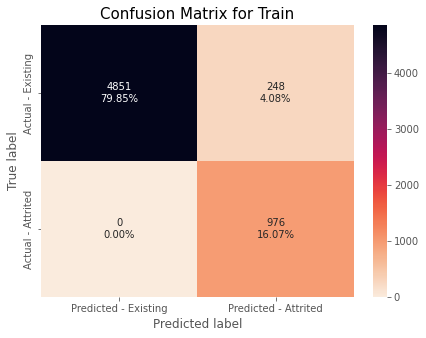

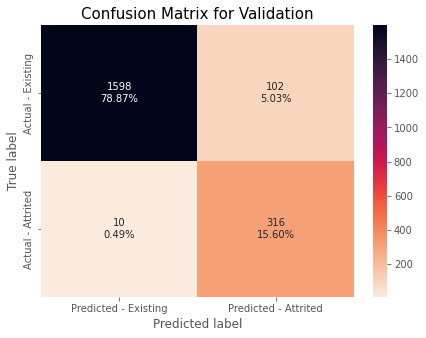

<IPython.core.display.Javascript object>

In [59]:
# Create a pipeline
pipe_xgbc_under = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss"),
)

# Fit on train data
pipe_xgbc_under.fit(X_train_under, Y_train_under)

# Generate score on train, validation and test data
get_metrics_score(
    pipe_xgbc_under,
    "XGBoostClassifier_undersampled",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    False,
)

- The XGBoost Classifier is slightly overfitting on undersampled data

- ## Summarizing the results from 21 models

In [60]:
results_21_dict = {
    "Model Names": model_name,
    "Accuracy Train": acc_train,
    "Accuracy Validation": acc_val,
    "Recall Train": recall_train,
    "Recall Validation": recall_val,
    "Precision Train": precision_train,
    "Precision Validation": precision_val,
    "F1-Score Train": f1_train,
    "F1-Score Validation": f1_val,
}

results_21_models = (
    pd.DataFrame.from_dict(results_21_dict)
    .set_index("Model Names")
    .sort_values(by="Recall Validation", ascending=False)
)

display(results_21_models)

Accuracy Train  Accuracy Validation  \
Model Names                                                                    
XGBoostClassifier_undersampled                    0.959                0.945   
AdaBoostClassifier_undersampled                   0.932                0.933   
GradientBoostingClassifier_undersampled           0.945                0.940   
RandomForest_undersampled                         0.948                0.930   
BaggingClassifier_undersampled                    0.945                0.927   
DecisionTree_undersampled                         0.919                0.889   
GradientBoostingClassifier_oversampled            0.968                0.955   
XGBoostClassifier_oversampled                     0.968                0.955   
AdaBoostClassifier_oversampled                    0.947                0.947   
BaggingClassifier_oversampled                     0.999                0.952   
LogisticRegression_undersampled                   0.841                0.853   
RandomForest_oversampled                          1.000                0.955   
XGBoostClassifier                                 0.973                0.970   
GradientBoostingClassifier                        0.973                0.970   
AdaBoostClassifier                                0.960                0.960   
DecisionTree_oversampled                          1.000                0.939   
BaggingClassifier                                 0.997                0.957   
DecisionTree                                      1.000                0.938   
RandomForest                                      1.000                0.958   
LogisticRegression_oversampled                    0.881                0.885   
LogisticRegression                                0.902                0.913   

                                         Recall Train  Recall Validation  \
Model Names                                                                
XGBoostClassifier_undersampled                  1.000              0.969   
AdaBoostClassifier_undersampled                 0.954              0.969   
GradientBoostingClassifier_undersampled         0.982              0.963   
RandomForest_undersampled                       1.000              0.929   
BaggingClassifier_undersampled                  0.993              0.917   
DecisionTree_undersampled                       1.000              0.905   
GradientBoostingClassifier_oversampled          0.930              0.896   
XGBoostClassifier_oversampled                   0.930              0.896   
AdaBoostClassifier_oversampled                  0.887              0.893   
BaggingClassifier_oversampled                   0.998              0.883   
LogisticRegression_undersampled                 0.848              0.871   
RandomForest_oversampled                        1.000              0.868   
XGBoostClassifier                               0.875              0.868   
GradientBoostingClassifier                      0.875              0.868   
AdaBoostClassifier                              0.849              0.859   
DecisionTree_oversampled                        1.000              0.853   
BaggingClassifier                               0.987              0.819   
DecisionTree                                    1.000              0.813   
RandomForest                                    1.000              0.801   
LogisticRegression_oversampled                  0.663              0.699   
LogisticRegression                              0.574              0.613   

                                         Precision Train  \
Model Names                                                
XGBoostClassifier_undersampled                     0.797   
AdaBoostClassifier_undersampled                    0.716   
GradientBoostingClassifier_undersampled            0.751   
RandomForest_undersampled                          0.757   
BaggingClassifier_undersampled                     0.749   
DecisionTree_undersampled      

<IPython.core.display.Javascript object>

- Based on our analysis so far, following are the top 4 calssifiers on the basis of recall score on validation set,
    - Adaboost with undersampled data
    - XGBoost with undersampled data
    - GBM with undersampled data
    - Random Forest with undersampled data
    
- We will further tune these models using random search hyperparameter tuning
- We will assemble these models in a list and get them ready for K fold cross validation

In [61]:
models_pre_tuned = [pipe_xgbc_under, pipe_abc_under, pipe_gbc_under, pipe_rf_under]
models_pre_tuned_name = [
    "XGBoost",
    "AdaBoost",
    "GradientBoost",
    "RandomForest",
]

<IPython.core.display.Javascript object>

- ### K Fold validation of the selected models before Hyperparameter tuning on undrsampled training data

In [62]:
models_pre_tuned_cvresults = []

scoring = "recall"
kfold = StratifiedKFold(
    n_splits=8, shuffle=True, random_state=1
)  # Setting number of splits equal to 8

for i, model in enumerate(models_pre_tuned):
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=Y_train, scoring=scoring, cv=kfold
    )
    models_pre_tuned_cvresults.append(cv_result)
    print(
        f"{models_pre_tuned_name[i]} has average K-Fold CV score of {cv_result.mean()*100:.2f} %"
    )

XGBoost has average K-Fold CV score of 86.78 %
AdaBoost has average K-Fold CV score of 80.43 %
GradientBoost has average K-Fold CV score of 82.58 %
RandomForest has average K-Fold CV score of 77.46 %


<IPython.core.display.Javascript object>

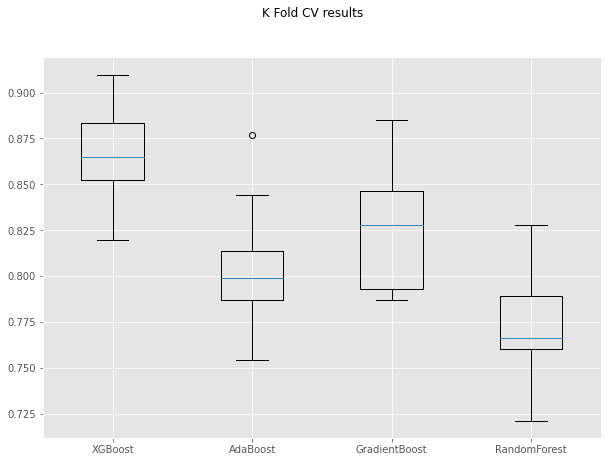

<IPython.core.display.Javascript object>

In [63]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("K Fold CV results")
ax = fig.add_subplot(111)

plt.boxplot(models_pre_tuned_cvresults)
ax.set_xticklabels(models_pre_tuned_name)

plt.show()

- ### Hyperparameter Tuning

- Based on [this article](https://medium.com/@kocur4d/hyper-parameter-tuning-with-pipelines-5310aff069d6) we can use the pipelines for random search cv.

- Also, creating empty arrays to store the tuned models data

In [64]:
## defining empty lists to add train and test results
model_name = []

acc_train = []
acc_val = []
acc_test = []

recall_train = []
recall_val = []
recall_test = []

precision_train = []
precision_val = []
precision_test = []

f1_train = []
f1_val = []
f1_test = []

<IPython.core.display.Javascript object>

- #### Randomized search for XGBoost model

In [65]:
%%time

# defining model
model = pipe_xgbc_under

# Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,150,50),
            'xgbclassifier__scale_pos_weight':[2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.8,0.9,1],
            'xgbclassifier__max_depth':np.arange(1,5,1),
            'xgbclassifier__reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
pipe_xgbc_under_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
pipe_xgbc_under_tuned.fit(X_train_under,Y_train_under)

print("Best parameters are {} with CV score={}:" .format(pipe_xgbc_under_tuned.best_params_,pipe_xgbc_under_tuned.best_score_))

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mopsie/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

Best parameters are {'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 5, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__max_depth': 1, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 1} with CV score=1.0:
CPU times: user 3.27 s, sys: 267 ms, total: 3.53 s
Wall time: 17min 13s


<IPython.core.display.Javascript object>

Metric                            Model_Name Train_Accuracy  \
Score   XGBoostClassifier_undersampled_tuned          0.161   

Metric Validation_Accuracy Test_Accuracy Train_Recall Validation_Recall  \
Score                0.161         0.160        1.000             1.000   

Metric Test_Recall Train_Precision Validation_Precision Test_Precision  \
Score        1.000           0.161                0.161          0.160   

Metric Train_F1-Score Validation_F1-Score Test_F1-Score  
Score           0.277               0.277         0.276

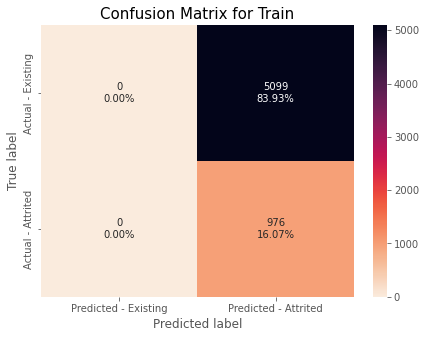

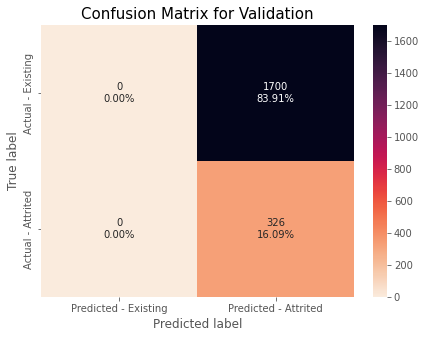

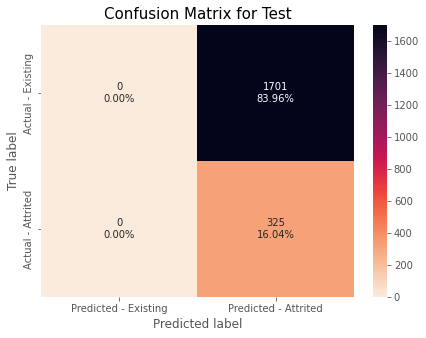

<IPython.core.display.Javascript object>

In [66]:
pipe_xgbc_under_tuned = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        subsample=0.9,
        scale_pos_weight=10,
        reg_lambda=5,
        n_estimators=50,
        max_depth=1,
        learning_rate=0.01,
        gamma=1,
        eval_metric="logloss",
    ),
)
pipe_xgbc_under_tuned.fit(X_train_under, Y_train_under)
get_metrics_score(
    pipe_xgbc_under_tuned,
    "XGBoostClassifier_undersampled_tuned",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    True,
)

- #### Randomized search for Gradient Boost model

In [67]:
%%time

# defining model
model = pipe_gbc_under

# Parameter grid to pass in RandomizedSearchCV

param_grid={'gradientboostingclassifier__n_estimators':np.arange(50,250,50),
            'gradientboostingclassifier__learning_rate':[0.01,0.05,0.1,0.2,0.3,0.5,1,1.1,1.2],
            "gradientboostingclassifier__subsample": [0.8, 0.9, 1],
            "gradientboostingclassifier__max_features": np.arange(0.2,1,0.1),            
            "gradientboostingclassifier__max_depth": np.arange(2,10)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
pipe_gbc_under_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
pipe_gbc_under_tuned.fit(X_train_under,Y_train_under)

print("Best parameters are {} with CV score={}:" .format(pipe_gbc_under_tuned.best_params_,pipe_gbc_under_tuned.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 0.9, 'gradientboostingclassifier__n_estimators': 200, 'gradientboostingclassifier__max_features': 0.8000000000000003, 'gradientboostingclassifier__max_depth': 8, 'gradientboostingclassifier__learning_rate': 0.2} with CV score=0.9631240188383046:
CPU times: user 3.64 s, sys: 62.5 ms, total: 3.7 s
Wall time: 46.5 s


<IPython.core.display.Javascript object>

Metric                                     Model_Name Train_Accuracy  \
Score   GradientBoostingClassifier_undersampled_tuned          0.954   

Metric Validation_Accuracy Test_Accuracy Train_Recall Validation_Recall  \
Score                0.941         0.942        1.000             0.972   

Metric Test_Recall Train_Precision Validation_Precision Test_Precision  \
Score        0.972           0.779                0.742          0.745   

Metric Train_F1-Score Validation_F1-Score Test_F1-Score  
Score           0.876               0.842         0.844

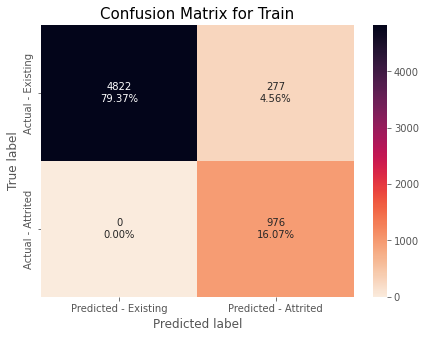

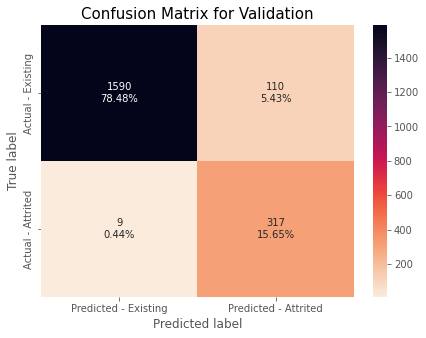

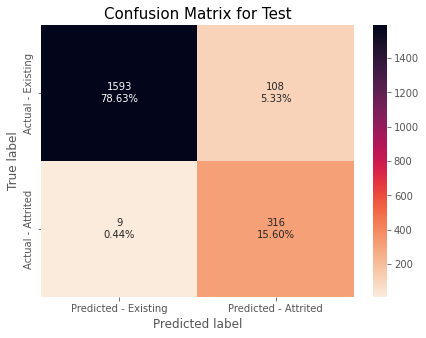

<IPython.core.display.Javascript object>

In [68]:
pipe_gbc_under_tuned = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        subsample=0.9,
        n_estimators=200,
        max_features=0.8000000000000003,
        max_depth=8,
        learning_rate=0.2,
    ),
)


pipe_gbc_under_tuned.fit(X_train_under, Y_train_under)

get_metrics_score(
    pipe_gbc_under_tuned,
    "GradientBoostingClassifier_undersampled_tuned",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    True,
)

- #### Randomized search for AdaBoost model

In [69]:
%%time

# defining model
model = pipe_abc_under

# Parameter grid to pass in RandomizedSearchCV

param_grid={'adaboostclassifier__n_estimators':np.arange(50,250,50),
            'adaboostclassifier__learning_rate':[0.01,0.05,0.1,0.2,0.3,0.5,1,1.1,1.2],
            "adaboostclassifier__algorithm": ['SAMME', 'SAMME.R'],
            "adaboostclassifier__base_estimator": [DecisionTreeClassifier(random_state=1, max_depth=1),
                                                   DecisionTreeClassifier(random_state=1, max_depth=2),
                                                   DecisionTreeClassifier(random_state=1, max_depth=3)]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
pipe_abc_under_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
pipe_abc_under_tuned.fit(X_train_under,Y_train_under)

print("Best parameters are {} with CV score={}:" .format(pipe_abc_under_tuned.best_params_,pipe_abc_under_tuned.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 150, 'adaboostclassifier__learning_rate': 1.1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'adaboostclassifier__algorithm': 'SAMME'} with CV score=0.957985347985348:
CPU times: user 1.95 s, sys: 52.7 ms, total: 2 s
Wall time: 36.6 s


<IPython.core.display.Javascript object>

Metric                             Model_Name Train_Accuracy  \
Score   AdaBoostClassifier_undersampled_tuned          0.960   

Metric Validation_Accuracy Test_Accuracy Train_Recall Validation_Recall  \
Score                0.945         0.941        1.000             0.972   

Metric Test_Recall Train_Precision Validation_Precision Test_Precision  \
Score        0.969           0.802                0.757          0.743   

Metric Train_F1-Score Validation_F1-Score Test_F1-Score  
Score           0.890               0.851         0.841

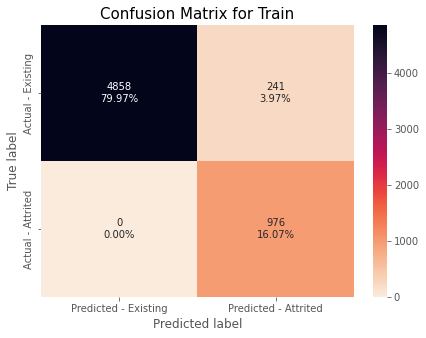

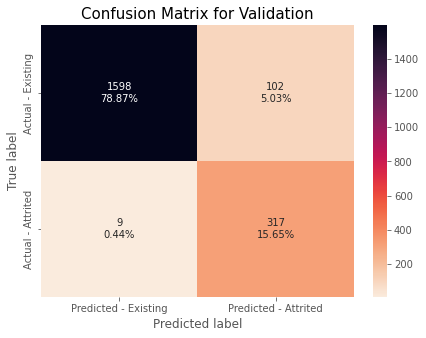

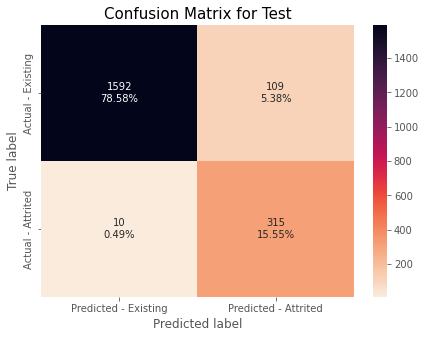

<IPython.core.display.Javascript object>

In [70]:
pipe_abc_under_tuned = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        n_estimators=150,
        learning_rate=1.1,
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        algorithm="SAMME",
    ),
)


pipe_abc_under_tuned.fit(X_train_under, Y_train_under)

get_metrics_score(
    pipe_abc_under_tuned,
    "AdaBoostClassifier_undersampled_tuned",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    True,
)

- #### Randomized search for Random Forest model

In [71]:
%%time

# defining model
model = pipe_rf_under

# Parameter grid to pass in RandomizedSearchCV

param_grid = {
    "randomforestclassifier__n_estimators": [100, 150, 200, 250],
    "randomforestclassifier__min_samples_leaf": np.arange(5, 10),
    "randomforestclassifier__max_features": list(np.arange(0.2,1,0.1)) + ['auto'],
    "randomforestclassifier__max_samples": np.arange(0.3, 0.7, 0.1),
    "randomforestclassifier__max_depth":np.arange(2,10),
    'randomforestclassifier__criterion':['gini', 'entropy', 'log_loss'] 
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
pipe_rf_under_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
pipe_rf_under_tuned.fit(X_train_under,Y_train_under)

print("Best parameters are {} with CV score={}:" .format(pipe_rf_under_tuned.best_params_,pipe_rf_under_tuned.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_leaf': 8, 'randomforestclassifier__max_samples': 0.6000000000000001, 'randomforestclassifier__max_features': 0.7000000000000002, 'randomforestclassifier__max_depth': 7, 'randomforestclassifier__criterion': 'gini'} with CV score=0.9416221873364732:
CPU times: user 1.57 s, sys: 49.9 ms, total: 1.62 s
Wall time: 21.9 s


<IPython.core.display.Javascript object>

Metric                                 Model_Name Train_Accuracy  \
Score   RandomForestClassifier_undersampled_tuned          0.916   

Metric Validation_Accuracy Test_Accuracy Train_Recall Validation_Recall  \
Score                0.907         0.904        0.957             0.936   

Metric Test_Recall Train_Precision Validation_Precision Test_Precision  \
Score        0.954           0.665                0.646          0.634   

Metric Train_F1-Score Validation_F1-Score Test_F1-Score  
Score           0.785               0.764         0.762

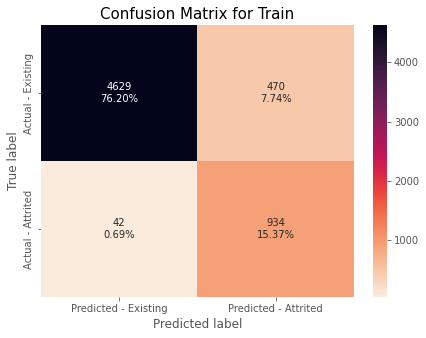

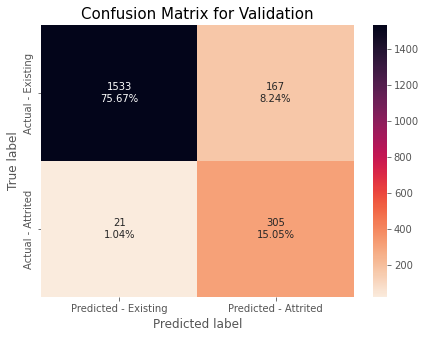

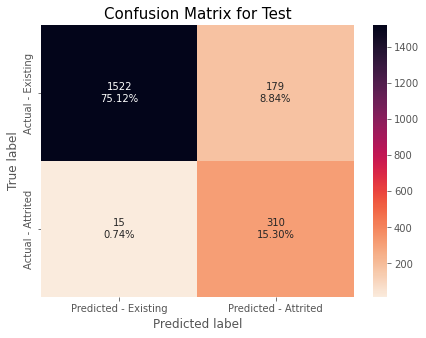

<IPython.core.display.Javascript object>

In [72]:
pipe_rf_under_tuned = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=200,
        min_samples_leaf=8,
        max_samples=0.6000000000000001,
        max_features=0.7000000000000002,
        max_depth=7,
        criterion="gini",
    ),
)


pipe_rf_under_tuned.fit(X_train_under, Y_train_under)

get_metrics_score(
    pipe_rf_under_tuned,
    "RandomForestClassifier_undersampled_tuned",
    X_train,
    X_val,
    X_test,
    Y_train,
    Y_val,
    Y_test,
    True,
)

- ## Summarizing the results from the 4 tuned models

In [73]:
results_tuned_dict = {
    "Model Names": model_name,
    "Accuracy Train": acc_train,
    "Accuracy Validation": acc_val,
    "Accuracy Test": acc_test,
    "Recall Train": recall_train,
    "Recall Validation": recall_val,
    "Recall Test": recall_test,
    "Precision Train": precision_train,
    "Precision Validation": precision_val,
    "Precision Test": precision_test,
    "F1-Score Train": f1_train,
    "F1-Score Validation": f1_val,
    "F1-Score Test": f1_test,
}

results_tuned_models = (
    pd.DataFrame.from_dict(results_tuned_dict)
    .set_index("Model Names")
    .sort_values(by="Recall Validation", ascending=False)
)

display(results_tuned_models)

Accuracy Train  \
Model Names                                                     
XGBoostClassifier_undersampled_tuned                    0.161   
GradientBoostingClassifier_undersampled_tuned           0.954   
AdaBoostClassifier_undersampled_tuned                   0.960   
RandomForestClassifier_undersampled_tuned               0.916   

                                               Accuracy Validation  \
Model Names                                                          
XGBoostClassifier_undersampled_tuned                         0.161   
GradientBoostingClassifier_undersampled_tuned                0.941   
AdaBoostClassifier_undersampled_tuned                        0.945   
RandomForestClassifier_undersampled_tuned                    0.907   

                                               Accuracy Test  Recall Train  \
Model Names                                                                  
XGBoostClassifier_undersampled_tuned                   0.160         1.000   
GradientBoostingClassifier_undersampled_tuned          0.942         1.000   
AdaBoostClassifier_undersampled_tuned                  0.941         1.000   
RandomForestClassifier_undersampled_tuned              0.904         0.957   

                                               Recall Validation  Recall Test  \
Model Names                                                                     
XGBoostClassifier_undersampled_tuned                       1.000        1.000   
GradientBoostingClassifier_undersampled_tuned              0.972        0.972   
AdaBoostClassifier_undersampled_tuned                      0.972        0.969   
RandomForestClassifier_undersampled_tuned                  0.936        0.954   

                                               Precision Train  \
Model Names                                                      
XGBoostClassifier_undersampled_tuned                     0.161   
GradientBoostingClassifier_undersampled_tuned            0.779   
AdaBoostClassifier_undersampled_tuned                    0.802   
RandomForestClassifier_undersampled_tuned                0.665   

                                               Precision Validation  \
Model Names                                                           
XGBoostClassifier_undersampled_tuned                          0.161   
GradientBoostingClassifier_undersampled_tuned                 0.742   
AdaBoostClassifier_undersampled_tuned                         0.757   
RandomForestClassifier_undersampled_tuned                     0.646   

                                               Precision Test  F1-Score Train  \
Model Names                                                                     
XGBoostClassifier_undersampled_tuned                    0.160           0.277   
GradientBoostingClassifier_undersampled_tuned           0.745           0.876   
AdaBoostClassifier_undersampled_tuned                   0.743           0.890   
RandomForestClassifier_undersampled_tuned               0.634           0.785   

                                               F1-Score Validation  \
Model Names                                                          
XGBoostClassifier_undersampled_tuned                         0.277   
GradientBoostingClassifier_undersampled_tuned                0.842   
AdaBoostClassifier_undersampled_tuned                        0.851   
RandomForestClassifier_undersampled_tuned                    0.764   

                                               F1-Score Test  
Model Names                                                   
XGBoostClassifier_undersampled_tuned                   0.276  
GradientBoostingClassifier_undersampled_tuned          0.844  
AdaBoostClassifier_undersampled_tuned                  0.841  
RandomForestClassifier_undersampled_tuned              0.762

<IPython.core.display.Javascript object>

- ### K Fold validation of the selected models after Hyperparameter tuning on undrsampled training data

In [74]:
models_tuned = [
    pipe_xgbc_under_tuned,
    pipe_abc_under_tuned,
    pipe_gbc_under_tuned,
    pipe_rf_under_tuned,
]
models_tuned_name = [
    "XGBoost",
    "AdaBoost",
    "GradientBoost",
    "RandomForest",
]

<IPython.core.display.Javascript object>

- #### Results of K Fold CV based on Recall

XGBoost has average K-Fold CV score of 85.55 %
AdaBoost has average K-Fold CV score of 85.45 %
GradientBoost has average K-Fold CV score of 86.17 %
RandomForest has average K-Fold CV score of 79.92 %


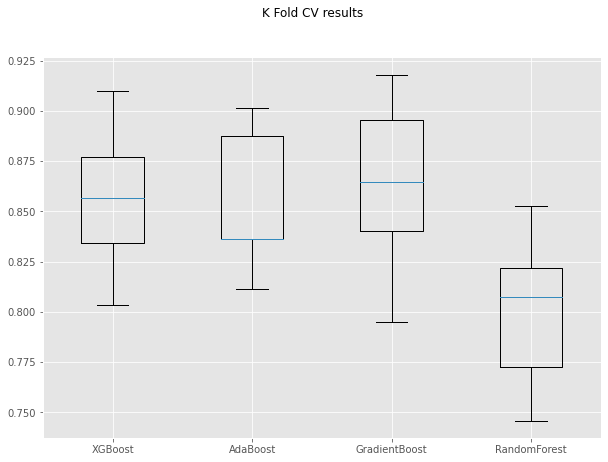

<IPython.core.display.Javascript object>

In [75]:
##
models_tuned_cvresults = []

scoring = "recall"
kfold = StratifiedKFold(
    n_splits=8, shuffle=True, random_state=1
)  # Setting number of splits equal to 8

for i, model in enumerate(models_tuned):
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=Y_train, scoring=scoring, cv=kfold
    )
    models_tuned_cvresults.append(cv_result)
    print(
        f"{models_tuned_name[i]} has average K-Fold CV score of {cv_result.mean()*100:.2f} %"
    )

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("K Fold CV results")
ax = fig.add_subplot(111)

plt.boxplot(models_tuned_cvresults)
ax.set_xticklabels(models_tuned_name)

plt.show()

- #### Results of K Fold CV based on F1 score

XGBoost has average K-Fold CV score of 48.96 %
AdaBoost has average K-Fold CV score of 88.28 %
GradientBoost has average K-Fold CV score of 89.28 %
RandomForest has average K-Fold CV score of 84.12 %


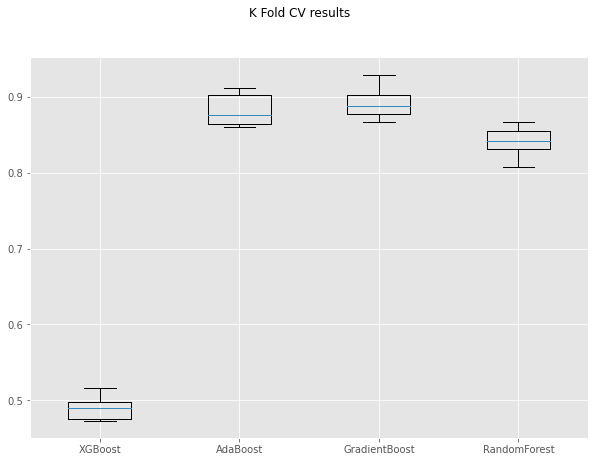

<IPython.core.display.Javascript object>

In [76]:
models_tuned_cvresults = []

scoring = "f1"
kfold = StratifiedKFold(
    n_splits=8, shuffle=True, random_state=1
)  # Setting number of splits equal to 8

for i, model in enumerate(models_tuned):
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=Y_train, scoring=scoring, cv=kfold
    )
    models_tuned_cvresults.append(cv_result)
    print(
        f"{models_tuned_name[i]} has average K-Fold CV score of {cv_result.mean()*100:.2f} %"
    )

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("K Fold CV results")
ax = fig.add_subplot(111)

plt.boxplot(models_tuned_cvresults)
ax.set_xticklabels(models_tuned_name)

plt.show()

- #### Results of K Fold CV based on Fbeta score

- Here we have defined a new scorer which is Fbeta scorer which gives 5 times more weightage to recall than precision
- The idea behind using Fbeta score is based on the thought that it can help us identify the model which will
    - reduce the misidentification of customers who will be canceling their credit cards (False Negatives) hence reducing the loss of customers and loss of business
    - reduce the misidentification of customers who won't be canceling their credit cards (False Positives) hence reducing the loss of resources towards the customers who will be sticking with their credit cards

XGBoost has average K-Fold CV score of 80.90 %
AdaBoost has average K-Fold CV score of 85.66 %
GradientBoost has average K-Fold CV score of 85.80 %
RandomForest has average K-Fold CV score of 80.02 %


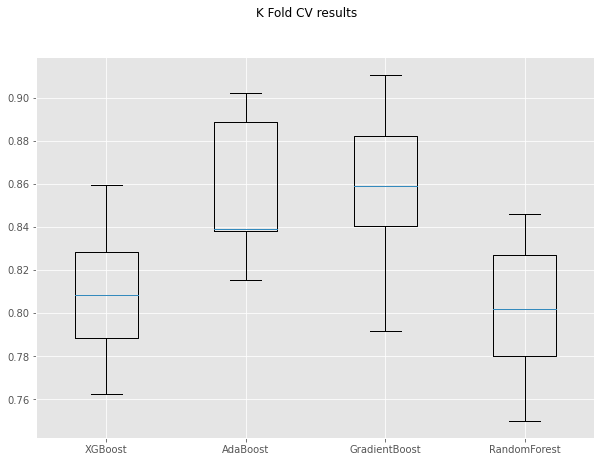

<IPython.core.display.Javascript object>

In [77]:
##
models_tuned_cvresults = []
fbeta_scorer = metrics.make_scorer(metrics.fbeta_score, beta=5)
kfold = StratifiedKFold(
    n_splits=8, shuffle=True, random_state=1
)  # Setting number of splits equal to 8

for i, model in enumerate(models_tuned):
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=Y_train, scoring=fbeta_scorer, cv=kfold
    )
    models_tuned_cvresults.append(cv_result)
    print(
        f"{models_tuned_name[i]} has average K-Fold CV score of {cv_result.mean()*100:.2f} %"
    )

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("K Fold CV results")
ax = fig.add_subplot(111)

plt.boxplot(models_tuned_cvresults)
ax.set_xticklabels(models_tuned_name)

plt.show()

- Based on the results obtained from KFoldCV built up Recall, F1-Score and Fbeta-Score with beta = 5, this is what we have concluded
    - We will use **Gradient Boost model as our final model**
    - The close runner up is AdaBoost, followed by XGBoost and RandomForest

- ## Feature Importance

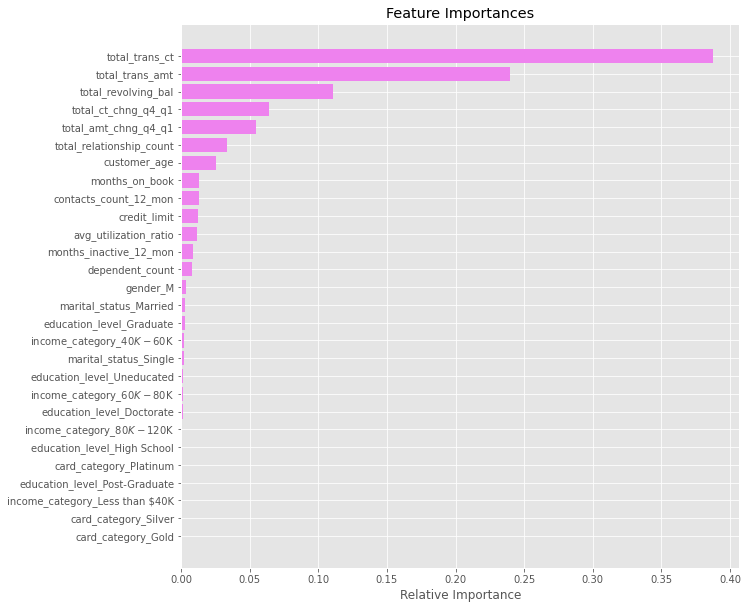

<IPython.core.display.Javascript object>

In [78]:
feature_names = X_train.columns
importances = pipe_gbc_under_tuned[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


Based on our analysis and details of Gradient Boost Classifier, the most important factors which can predict attrition of an existing customers are,
1. Total_trans_ct
2. Total_trans_amt
3. Total_revolving_bal
4. Total_amt_chng_q4_q1
5. Total_ct_chng_q4_q1

- #### A quick look at the SHAP values

In [79]:
import shap

shap.initjs()

<IPython.core.display.Javascript object>

In [80]:
explainer = shap.TreeExplainer(pipe_gbc_under_tuned.steps[1][1])
shap_values = explainer.shap_values(X)

<IPython.core.display.Javascript object>

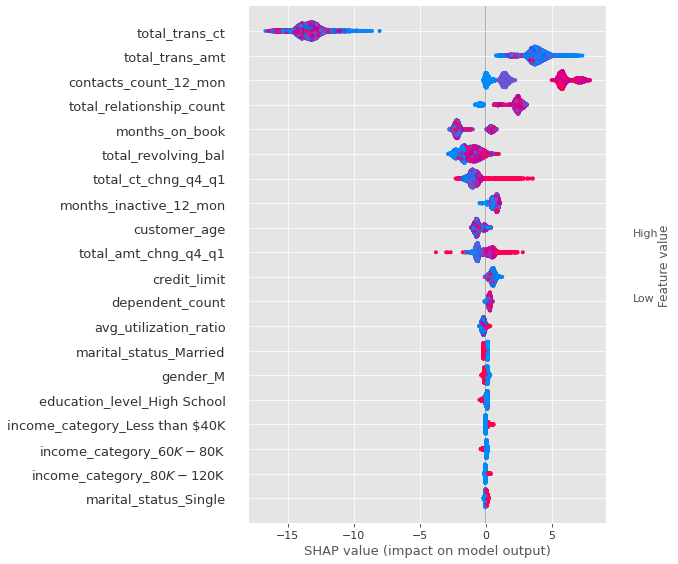

<IPython.core.display.Javascript object>

In [81]:
shap.summary_plot(shap_values, X)

Based on SHAP values of the variables that we have found to be important,
1. Total_trans_ct: higher total transaction count is a strong indicator of customer going to continue with the bank. It doesn't really matter how high or low the values of the feature is, as long as customer is using the credit card for transaction, they are going to stick with their credit cards.
2. Total_trans_amt: Smaller values of transaction amount is an indicator of customer dropping their credit cards
3. Total_revolving_bal: A smaller revolving balance indicates customer is planning to continue with the credit cards and higher value indicates otherwise
4. Total_amt_chng_q4_q1: In general higher the change in amount from q4 to q1 indicates attrition.
5. Total_ct_chng_q4_q1: In general higher the change in count from q4 to q1 indicates attrition.

Apart from the above feature few otheer features to pay attention towards are,
1. Contacts_count_12_mon: Higher the number of contacts in the last 12 month is a strong sign of attrition
2. Total_months_inactive: higher the number of inactive months is also a sign that customer might drop their cards
3. Dependent_count: Although not very strong, but higher dependent count can indicate that customer might leave their cards
4. Marital_status_married: Again, not a strong correlation but usally married customers stick with the credit card.

## Summary and Business reccomendations

- ### Summary  <br>

    - We have tested both non-boosted and boosted classifiers on the credit card churn dataset
    - The boosted classifiers which were trained on undersampled dataset gave the best performance
    - We tuned the top performing models using Random Search CV hyperparameter tuning
        - XGBoost
        - AdaBoost
        - GradientBoost
        - Random Forest
    - Out of all the algorithms, a **Tuned Gradient Boosting trained on undersampled data** performed the best on test data set
        - We evaluated model performance based on **Recall**, **F1-Score** and **F$_\beta$ Score ($\beta = 5$)**
    - We found following features to be crucial for customers attrition,   
        1. **Total_trans_ct**: higher total transaction count is a strong indicator of customer going to continue with the bank. It doesn't really matter how high or low the values of the feature is, as long as customer is using the credit card for transaction, they are going to stick with their credit cards.
        2. **Total_trans_amt**: Smaller values of transaction amount is an indicator of customer dropping their credit cards
        3. **Total_revolving_bal**: A smaller revolving balance indicates customer is planning to continue with the credit cards and higher value indicates otherwise
        4. **Total_amt_chng_q4_q1**: In general higher the change in amount from q4 to q1 indicates attrition.
        5. **Total_ct_chng_q4_q1**: In general higher the change in count from q4 to q1 indicates attrition.
        6. **Contacts_count_12_mon**: Higher the number of contacts in the last 12 month is a strong sign of attrition
        7. **Total_months_inactive**: higher the number of inactive months is also a sign that customer might drop their cards
        8. **Dependent_count**: Although not very strong, but higher dependent count can indicate that customer might leave their cards
        9. **Marital_status_married**: Again, not a strong correlation but usally married customers stick with the credit card.

- ### Business Recommendations   <br>

    - Fewer transactions and overall lower transaction amount done by a customer using their credit card is a very impactful signal of them attriting
        - The bank can target promotions and better cash back offers towards such customers to bring their transaction count up. They can offer some bigger cashbacks on higher transaction amounts as well like flight bookings etc.
    - Total revolving balance is a good indicator of customer dropping their credit card or not, pointing that the customer is not able to keep up with the payments.
        - For cutomers with higher revolving balance, the bank can offer consulting on how to lower their balance. The difficulty could be from technical or financial point. So identifying the source of delay in payments could lower the revolving balance and hence attrition
    - A higher change in count and amount of transactions from Q1 to Q4 is a good indicator of customers sticking with their credit cards.
        - Since there a quite a few holidays in the Q4, the bank can offer significant holiday purchase incentives to increase the Q1 to Q4 changes
    - Number of contacts between the customer and the bank is an important predictor
        - Bank should further caharacterize the reasons of contact and should consider to advertise about their new offers and cashback during those contacts
        
    - The number of months a customer has been inactive should be paid attention towards.
        - A nudge with an offer can help break the period of inactivity.

In [273]:
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from collections import defaultdict

<IPython.core.display.Javascript object>

In [353]:
def myProcessingSteps(df_in):

    df = df_in.copy()

    ## Drop the columns that we would like to not use ##
    df.drop(columns=["CLIENTNUM", "Avg_Open_To_Buy"], inplace=True, axis=1)

    ## Convert all column names to lower case ##
    df.columns = df.columns.str.lower()

    ## Replace the unknown data points in Income Category ##
    df["income_category"] = df["income_category"].replace({"abc": np.nan})

    ### KNN Imputation ####

    ## Get the columns with dtype object ##
    encodecols = df.select_dtypes(include="object").columns

    ## Initiate a label encoder ##
    le = LabelEncoder
    d = defaultdict(le)

    ## Encode columns with categorical data to integers ##
    df[encodecols] = df[encodecols].apply(
        lambda series: pd.Series(
            d[series.name].fit_transform(series[series.notnull()]),
            index=series[series.notnull()].index,
        )
    )

    ## Initiate the KNN imputer and impute missing values ##
    imputecols = df.columns[df.isnull().any()].to_list()
    knnimputer = KNNImputer(n_neighbors=6)
    df[imputecols] = knnimputer.fit_transform(df[imputecols])
    df[encodecols] = df[encodecols].apply(lambda x: np.round(x).astype("int32"))

    ## Encode the columns back to their original values ##
    df[encodecols] = df[encodecols].apply(
        lambda series: pd.Series(d[series.name].inverse_transform(series))
    )

    ## Create dummies ##
    df = pd.get_dummies(df, drop_first=True)

    return df


# The function created for processing the data should be passed as an arugument in the FunctionTransformer
processing = FunctionTransformer(myProcessingSteps)

<IPython.core.display.Javascript object>

In [354]:
df1 = data.copy()

# Convert target variable to int ##
attrition = {"Existing Customer": 0, "Attrited Customer": 1}
df1["Attrition_Flag"] = df1["Attrition_Flag"].map(attrition)

# Separating target variable and other variables
X = df1.drop(columns="Attrition_Flag")
Y = df1["Attrition_Flag"]

# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, Y_temp, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, Y_train, Y_val = train_test_split(
    X_temp, Y_temp, test_size=0.25, random_state=2, stratify=Y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 20) (2026, 20) (2026, 20)


<IPython.core.display.Javascript object>

In [355]:
print("Before Under Sampling, counts of label 'Attrited': {}".format(sum(Y_train == 1)))
print(
    "Before Under Sampling, counts of label 'Existing': {} \n".format(sum(Y_train == 0))
)

rus = RandomUnderSampler(random_state=1)  # Undersample dependent variable
X_train_under, Y_train_under = rus.fit_resample(X_train, Y_train)

print(
    "After Under Sampling, counts of label 'Attrited': {}".format(
        sum(Y_train_under == 1)
    )
)
print(
    "After Under Sampling, counts of label 'Existing': {} \n".format(
        sum(Y_train_under == 0)
    )
)

print("After Under Sampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(Y_train_under.shape))

Before Under Sampling, counts of label 'Attrited': 976
Before Under Sampling, counts of label 'Existing': 5099 

After Under Sampling, counts of label 'Attrited': 976
After Under Sampling, counts of label 'Existing': 976 

After Under Sampling, the shape of train_X: (1952, 20)
After Under Sampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

In [356]:
pipe = Pipeline(
    steps=[
        ("data_processing", processing),
        ("standard_scaler", StandardScaler()),
        (
            "gbm_classifier",
            GradientBoostingClassifier(
                subsample=0.9,
                n_estimators=200,
                max_features=0.8000000000000003,
                max_depth=8,
                learning_rate=0.2,
            ),
        ),
    ]
)
# # Fit the model on training data
pipe.fit(X_train_under, Y_train_under)

Pipeline(steps=[('data_processing',
                 FunctionTransformer(func=<function myProcessingSteps at 0x7febeca1ab80>)),
                ('standard_scaler', StandardScaler()),
                ('gbm_classifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=8,
                                            max_features=0.8000000000000003,
                                            n_estimators=200, subsample=0.9))])

<IPython.core.display.Javascript object>

In [357]:
get_metrics_score(
    pipe, "GBC", X_train, X_val, X_test, Y_train, Y_val, Y_test, True,
)

ValueError: X has 27 features, but StandardScaler is expecting 28 features as input.

<IPython.core.display.Javascript object>

In [ ]:
def get_metrics_score_final(
    model,
    modelname,
    X_train_in,
    X_test_in,
    Y_train_in,
    Y_test_in
):

    # Generate the predictions
    pred_train = np.round(model.predict(X_train_in))
    pred_test = np.round(model.predict(X_test_in))

    # Generate the metrics based on actual values and predictions #

    ## Accuracy ##
    train_acc = accuracy_score(Y_train_in, pred_train)
    test_acc = accuracy_score(Y_test_in, pred_test)

    ## Recall ##
    train_recall = recall_score(Y_train_in, pred_train)
    test_recall = recall_score(Y_test_in, pred_test)

    ## Precision ##
    train_precision = precision_score(Y_train_in, pred_train)
    test_precision = precision_score(Y_test_in, pred_test)

    ## F1 Score ##
    train_f1 = f1_score(Y_train_in, pred_train)
    test_f1 = f1_score(Y_test_in, pred_test)

    ## Create a list of metric names ##
    metrics = [
            "Model_Name",
            "Train_Accuracy",
            "Test_Accuracy",
            "Train_Recall",
            "Test_Recall",
            "Train_Precision",
            "Test_Precision",
            "Train_F1-Score",
            "Test_F1-Score",
        ]
    ## Create a list of the corresponding values of the metrics ##
    scores = [
            modelname,
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
        ]
    ## Create column names ##
    cols = ["Metric", "Score"]

    metric_score_tuple = [(name, val) for name, val in zip(metrics, scores)]

    display(
        pd.DataFrame.from_records(metric_score_tuple, columns=cols, index="Metric").T
    )
    # display confusion matrix
    make_confusion_matrix(model, X_train_in, Y_train_in, "Confusion Matrix for Train")
    make_confusion_matrix(model, X_test_in, Y_test_in, "Confusion Matrix for Test")